# 0.1 - Imports

In [ ]:
import pickle
import warnings

import pandas                as pd
import matplotlib.pyplot     as plt
import numpy                 as np
import seaborn               as sns
import matplotlib.ticker     as mtick

from sklearn.model_selection import train_test_split
from IPython.core.display    import HTML
from IPython.display         import Image
from sklearn.metrics         import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef, make_scorer, roc_curve
from sklearn.preprocessing   import OneHotEncoder, MinMaxScaler, RobustScaler

# 0.2 - Helper Function

In [4]:
display( HTML( '<style>.container { width:100% !important; }</style>') )
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
warnings.simplefilter(action='ignore', category=FutureWarning)

def descriptive_statistics(df1):
    ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
    ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
    d1 = pd.DataFrame(num_attributes.apply(np.std) ).T
    d2 = pd.DataFrame(num_attributes.apply(min)).T
    d3 = pd.DataFrame(num_attributes.apply(max)).T
    d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
    d7 = pd.DataFrame(num_attributes.apply(lambda x: np.percentile(x, 25))).T
    d8 = pd.DataFrame(num_attributes.apply(lambda x: np.percentile(x, 50))).T
    d9 = pd.DataFrame(num_attributes.apply(lambda x: np.percentile(x, 75))).T
    d10 = pd.DataFrame(num_attributes.apply(lambda x: np.percentile(x, 90))).T
    d11 = pd.DataFrame(num_attributes.apply(lambda x: np.percentile(x, 99))).T
    de_table = pd.concat([d4, ct1, ct2, d1, d5, d6, d2, d7, d8, d9, d10, d11, d3]).T.reset_index()
    de_table.columns = ['attributes', 'range', 'media', 'mediana', 'std', 'skew', 'kurtosis', 'min', '25%', '50%', '75%', '90%', '99%', 'max']
    pd.set_option('display.float_format', '{:.2f}'.format)
    pd.options.display.float_format = '{:,.2f}'.format
    return de_table

pd.options.display.float_format = None

# Define a função para formatar o eixo x em milhares
def milhares_x(x, pos):
    return '{:.0f}k'.format(x/1000)

# Define a função para formatar o eixo x em milhões
def milhoes_x(x, pos):
    return '{:.0f}m'.format(x/1000000)

# Define a função para formatar o eixo y em milhares
def milhares_y(y, pos):
    return '{:.0f}k'.format(y/1000)

# Define a função para formatar o eixo y em milhões
def milhoes_y(y, pos):
    return '{:.0f}m'.format(y/1000000)

def plot_count_percentage(data, x, title, ax):
    sns.countplot(x=x, data=data, ax=ax, order=data[x].value_counts().index)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
    ax.set_title(title)

    total = len(data[x])
    for p in ax.patches:
        percentage = p.get_height()/total
        ax.text(p.get_x() + p.get_width()/2,
                p.get_height(),
                '{:.2%}'.format(percentage),
                ha='center',
                va='bottom')

sns.set_theme(style="whitegrid")

def scores(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    df_scores = pd.DataFrame({'Score': ['Accuracy', 'Precisão', 'Recall', 'F1', 'ROC AUC'],
                              'Valor': [accuracy, precision, recall, f1, roc_auc]})

    df_scores['Valor'] = df_scores['Valor'].apply(lambda x: '{:.2f}%'.format(x * 100))

    return df_scores

def plot_bar_graph(data, x_column, title):
    plt.subplots(figsize=(24, 8))
    palette = sns.color_palette("Blues", 5)

    plt.bar(x=data[x_column], height=data['Fraud_rate'], color=palette)
    plt.title(title, fontsize=16)
    plt.ylabel('Fraud rate')
    plt.xticks(fontsize=14)
    
    for i, value in enumerate(data['Fraud_rate']):
        plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=14)

def plot_boxplots(dataframe, num_cols, num_rows, figsize=(24, 12)):
    fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)

    features = ['step', 'day', 'amount', 'nameOrigtransactionscount',
                'oldbalanceOrg', 'newbalanceOrig', 'balancevariationOrig', 'amountEqualbalancevariationOrig',
                'nameDesttransactionscount', 'oldbalanceDest', 'newbalanceDest', 'balancevariationDest',
                'amountEqualbalancevariationDest', 'MerchantDest', 'isFlaggedFraud', 'isFraud']

    for i, feature in enumerate(features):
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col]
        sns.boxplot(data=dataframe, y=feature, ax=ax)
        ax.set_title(f'Boxplot of {feature}')

    plt.tight_layout()
    plt.show()
    

# 0.3 - Data

## 0.3.1 - Loading dataset

In [4]:
df_raw = pd.read_csv(R'C:\Users\Gabriel_Alves\OneDrive - GFI\Documentos\Ciência de dados\Cursos\blocker_fraud_company\data\raw\PS_20174392719_1491204439457_log.csv')

## 0.3.2 - Split dataset into training and testing sets

In [ ]:
# Separating the predictor variables
X = df_raw.drop('isFraud', axis=1)
y = df_raw['isFraud']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [30]:
# showing that the division of the dataset maintained the same rate of the response variable
n_fraud_full = df_raw[df_raw['isFraud'] != 0].shape[0]
percent_fraud_full = n_fraud_full/df_raw.shape[0]

n_fraud_train = df_train[df_train['isFraud'] != 0].shape[0]
percent_fraud_test = n_fraud_train/df_train.shape[0]

n_fraud_test = df_test[df_test['isFraud'] != 0].shape[0]
percent_fraud_test = n_fraud_test/df_test.shape[0]

aux = pd.DataFrame({'FullDataset': [n_fraud_full, percent_fraud_full], 
                    'TrainDataset': [n_fraud_train, percent_fraud_test],
                    'TestDataset': [n_fraud_test, percent_fraud_test]}).rename({0: 'Total', 1: 'Percent'})

aux.loc['Total'] = aux.loc['Total'].apply(lambda x: "{:.0f}".format(x) if isinstance(x, (int, float)) else x)
aux.loc['Percent'] = aux.loc['Percent'].apply(lambda x: "{:.2%}".format(x) if isinstance(x, (int, float)) else x)

aux

,FullDataset,TrainDataset,TestDataset
Total,8213,6570,1643
Percent,0.13%,0.13%,0.13%


The train-test split maintained the same proportion of the response variable

In [12]:
# save train dataset
df_train = pd.concat([X_train, y_train], axis=1)

df_train.to_csv(R'C:\Users\Gabriel_Alves\Documents\Ciência de dados\Cursos\blocker_fraud_company\data\processed\train_set.csv', index=False)

# save test dataset
df_test = pd.concat([X_test, y_test], axis=1)

df_test.to_csv(R'C:\Users\Gabriel_Alves\Documents\Ciência de dados\Cursos\blocker_fraud_company\data\processed\test_set.csv', index=False)

#  1.0 - Data Description

In [13]:
df1 = df_train.copy()

## 1.1 - Data Types

In [15]:
df1.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud      int64
isFraud             int64
dtype: object

- It is not necessary to change the type of any column

## 1.2 - Data Dimensions

In [16]:
print(f'Number of Columns: {df1.shape[1]}')
print(f'Number of Rows:    {df1.shape[0]:n}')

Number of Columns: 11
Number of Rows:    5.090.096


## 1.3 - Check NA

In [17]:
#no pandas
df1.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
isFraud           0
dtype: int64

- It is not necessary to fill in any empty data

## 1.4 - Descriptive Statistics

In [18]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.4.1 - Numerical attributes

In [19]:
descriptive_statistics(df1)

,attributes,range,media,mediana,std,skew,kurtosis,min,25%,50%,75%,90%,99%,max
0,step,742.00,243.36,239.00,142.32,0.38,0.33,1.00,155.00,239.00,335.00,399.00,681.00,743.00
1,amount,"92,445,516.64","179,909.57","74,841.03","602,457.78",30.51,"1,736.80",0.00,"13,390.99","74,841.03","208,683.38","365,447.96","1,617,619.32","92,445,516.64"
2,oldbalanceOrg,"59,585,040.37","833,744.88","14,212.00","2,887,601.12",5.25,32.98,0.00,0.00,"14,212.00","107,338.00","1,820,848.21","16,024,027.87","59,585,040.37"
3,newbalanceOrig,"49,585,040.37","854,946.13",0.00,"2,923,386.27",5.18,32.07,0.00,0.00,0.00,"144,168.72","1,969,209.34","16,172,056.57","49,585,040.37"
4,oldbalanceDest,"356,015,889.35","1,100,383.43","132,801.07","3,403,514.34",20.11,964.98,0.00,0.00,"132,801.07","943,153.04","2,913,787.24","12,375,854.72","356,015,889.35"
5,newbalanceDest,"356,179,278.92","1,224,793.48","215,013.22","3,676,908.85",19.45,868.92,0.00,0.00,"215,013.22","1,112,537.02","3,194,143.40","13,140,251.18","356,179,278.92"
6,isFlaggedFraud,1.00,0.00,0.00,0.00,564.03,"318,126.31",0.00,0.00,0.00,0.00,0.00,0.00,1.00
7,isFraud,1.00,0.00,0.00,0.04,27.78,769.75,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [20]:
np.percentile(df1['amount'], 99)

1617619.3199999991

In [21]:
df1[df1['amount'] == 0].shape[0]

13

All of the 13 zero amounts are of type "CASH_OUT"

([<matplotlib.axis.XTick at 0x1d21ffdd250>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

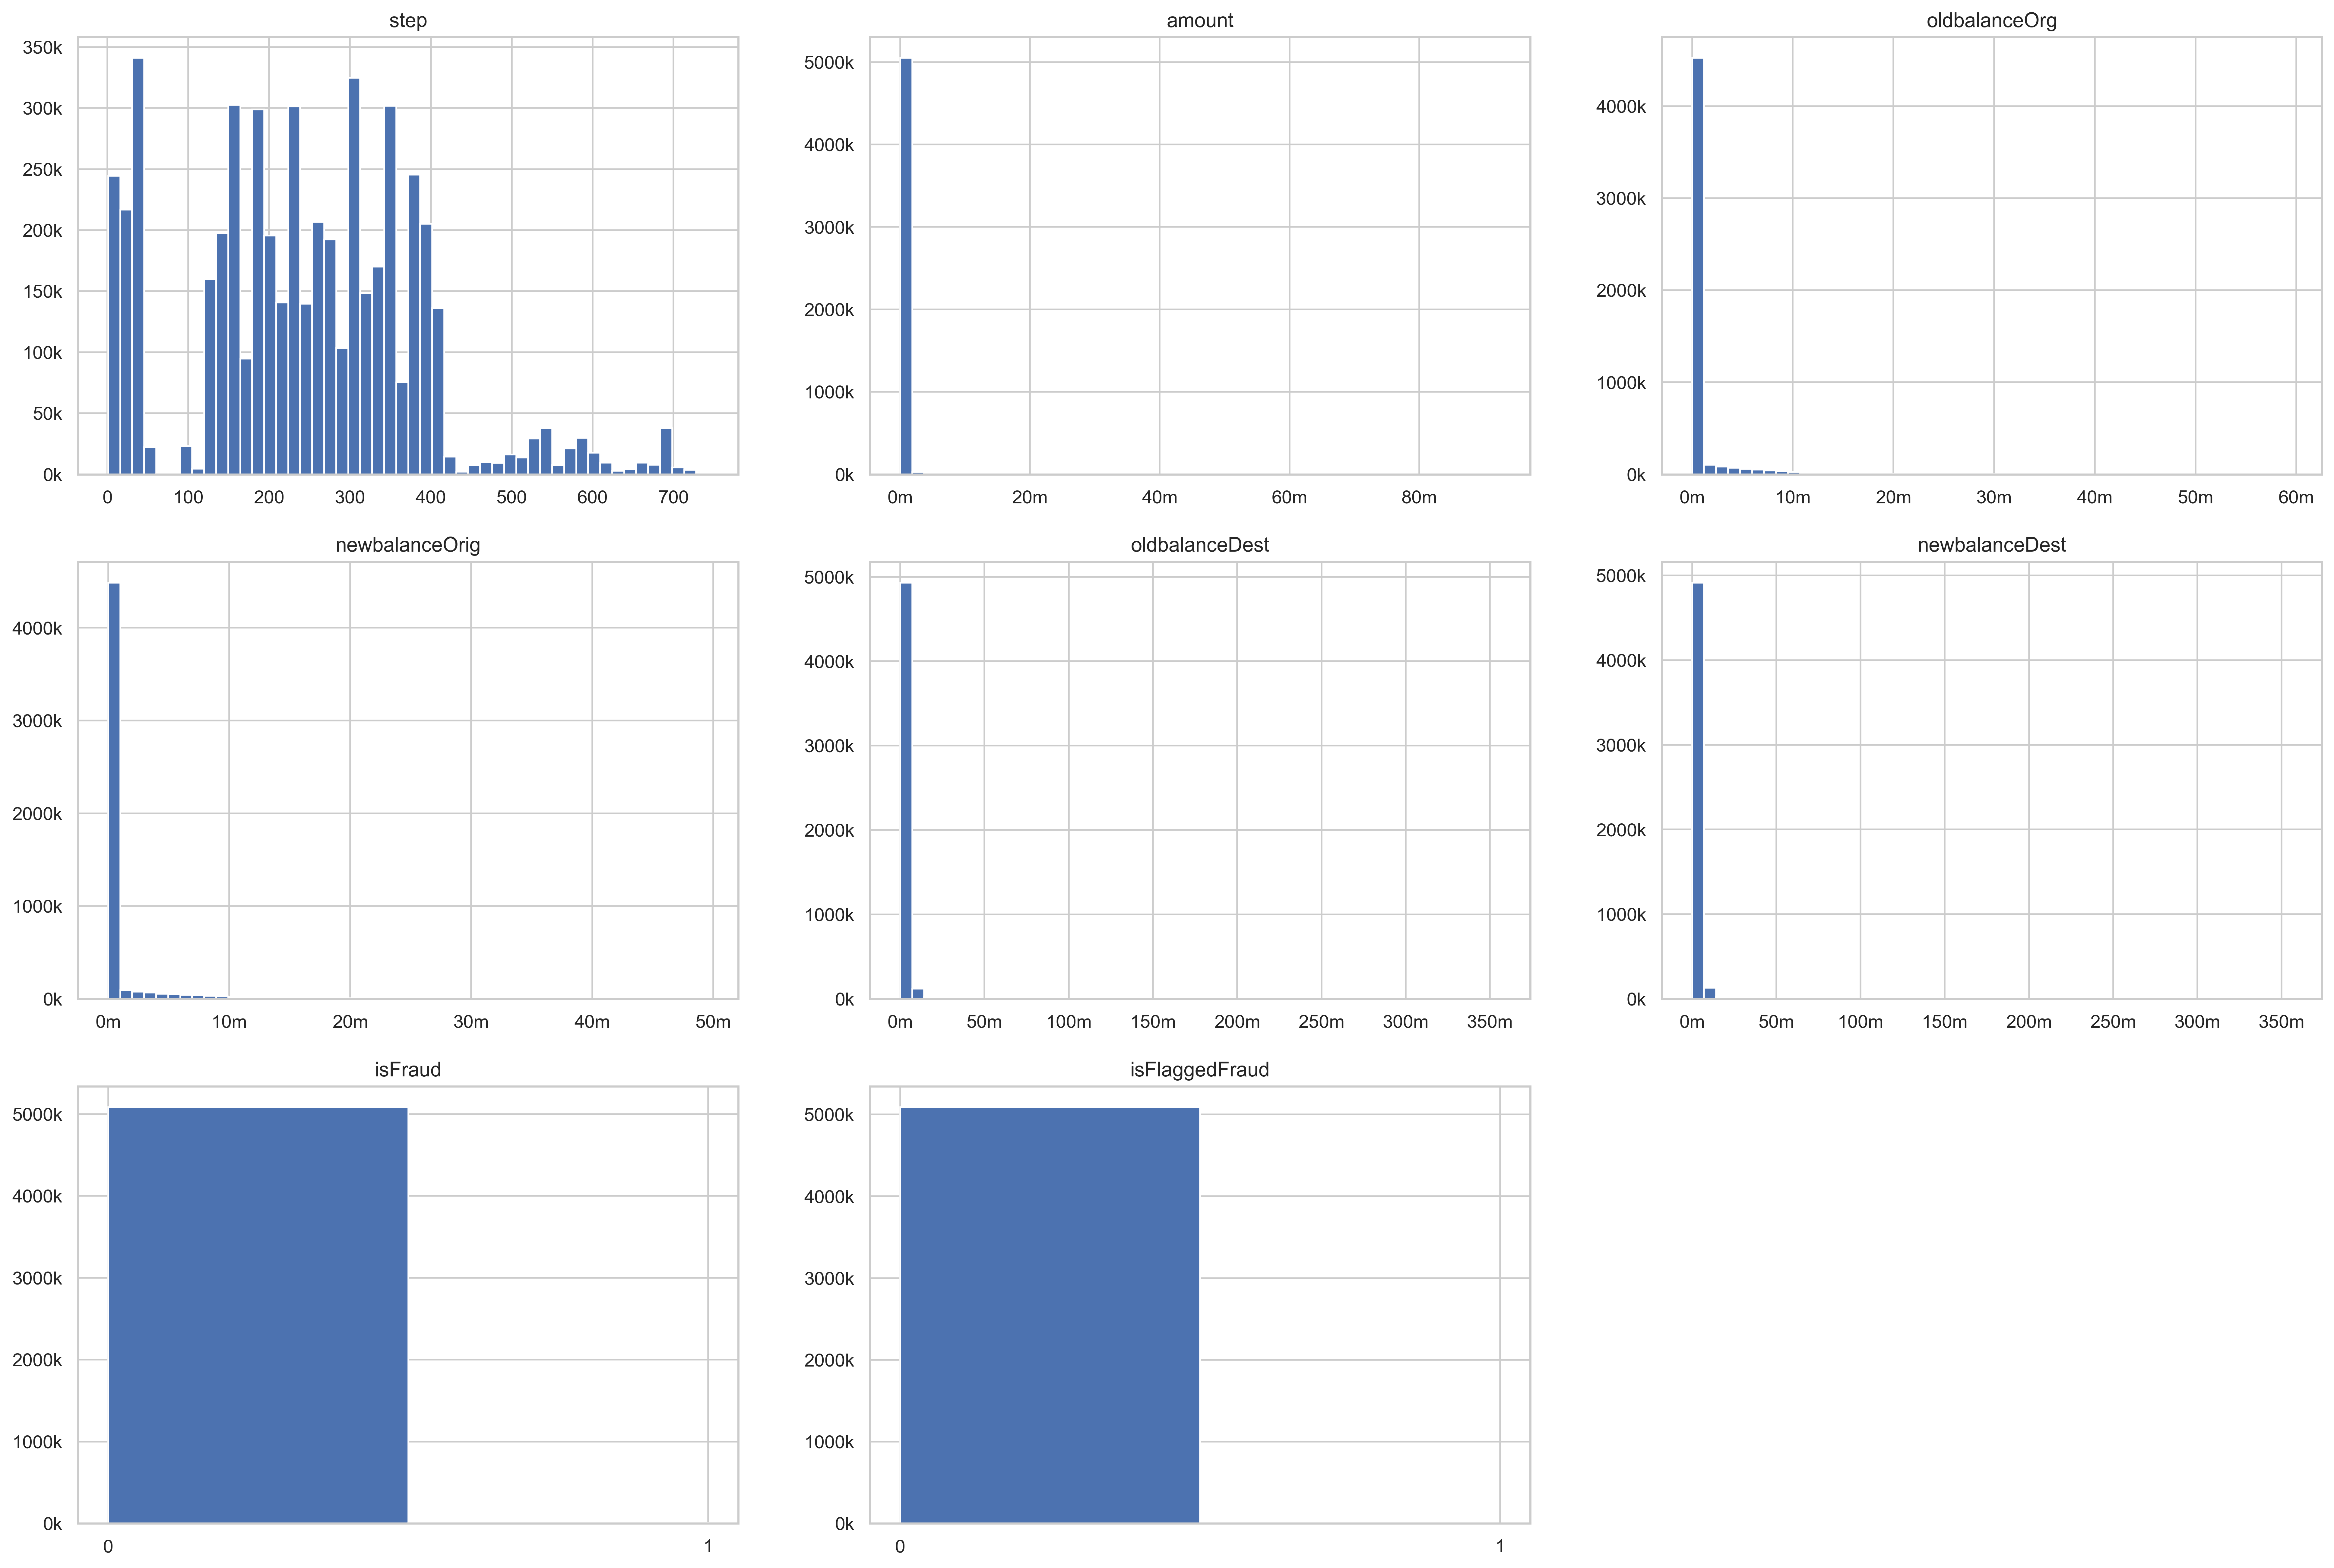

In [22]:
plt.subplot(3, 3, 1)
df1['step'].hist(bins= 50, figsize=(24,16))
plt.ticklabel_format(style = 'plain')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("step")

plt.subplot(3, 3, 2)
df1['amount'].hist(bins=50, figsize=(24,16))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("amount")

plt.subplot(3, 3, 3)
df1['oldbalanceOrg'].hist(bins=50, figsize=(24,16))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("oldbalanceOrg")

plt.subplot(3, 3, 4)
df1['newbalanceOrig'].hist(bins=50, figsize=(24,16))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("newbalanceOrig")

plt.subplot(3, 3, 5)
df1['oldbalanceDest'].hist(bins=50, figsize=(24,16))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("oldbalanceDest")

plt.subplot(3, 3, 6)
df1['newbalanceDest'].hist(bins=50, figsize=(24,16))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("newbalanceDest")

plt.subplot(3, 3, 7)
df1['isFraud'].hist(bins=2, figsize=(24,16))
plt.ticklabel_format(style = 'plain')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("isFraud")
plt.xticks([0, 1])

plt.subplot(3, 3, 8)
df1['isFlaggedFraud'].hist(bins=2, figsize=(24,16))
plt.ticklabel_format(style = 'plain')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("isFlaggedFraud")
plt.xticks([0, 1])


**Financial value features do not have negative values**

- step: A large portion of transactions were recorded in the first half of the period (90% between 1 to 399 - 10% from 400 to 743). Having a drop between steps 50 - 100, approximately.
- amount: 99% of the amounts vary up to 1.6 million. The remaining 1% varies from 1.6 million to 92 million, with the highest kurtosis of the dataset.
- oldbalanceOrg and newbalanceOrig: High Kurtosis, where most values are low (90% below 1.8/1.9 million, with 10% varying up to 59/49 million).
- oldbalanceDest and newbalanceDest: Kurtosis even higher than balanceOrig (99% below 12/13 million, with 1% varying up to 356 million).

### 1.4.2 - Categorical attributes

In [23]:
cat_attributes.describe()

,type,nameOrig,nameDest
count,5090096,5090096,5090096
unique,5,5084156,2266013
top,CASH_OUT,C724452879,C1590550415
freq,1790307,3,94


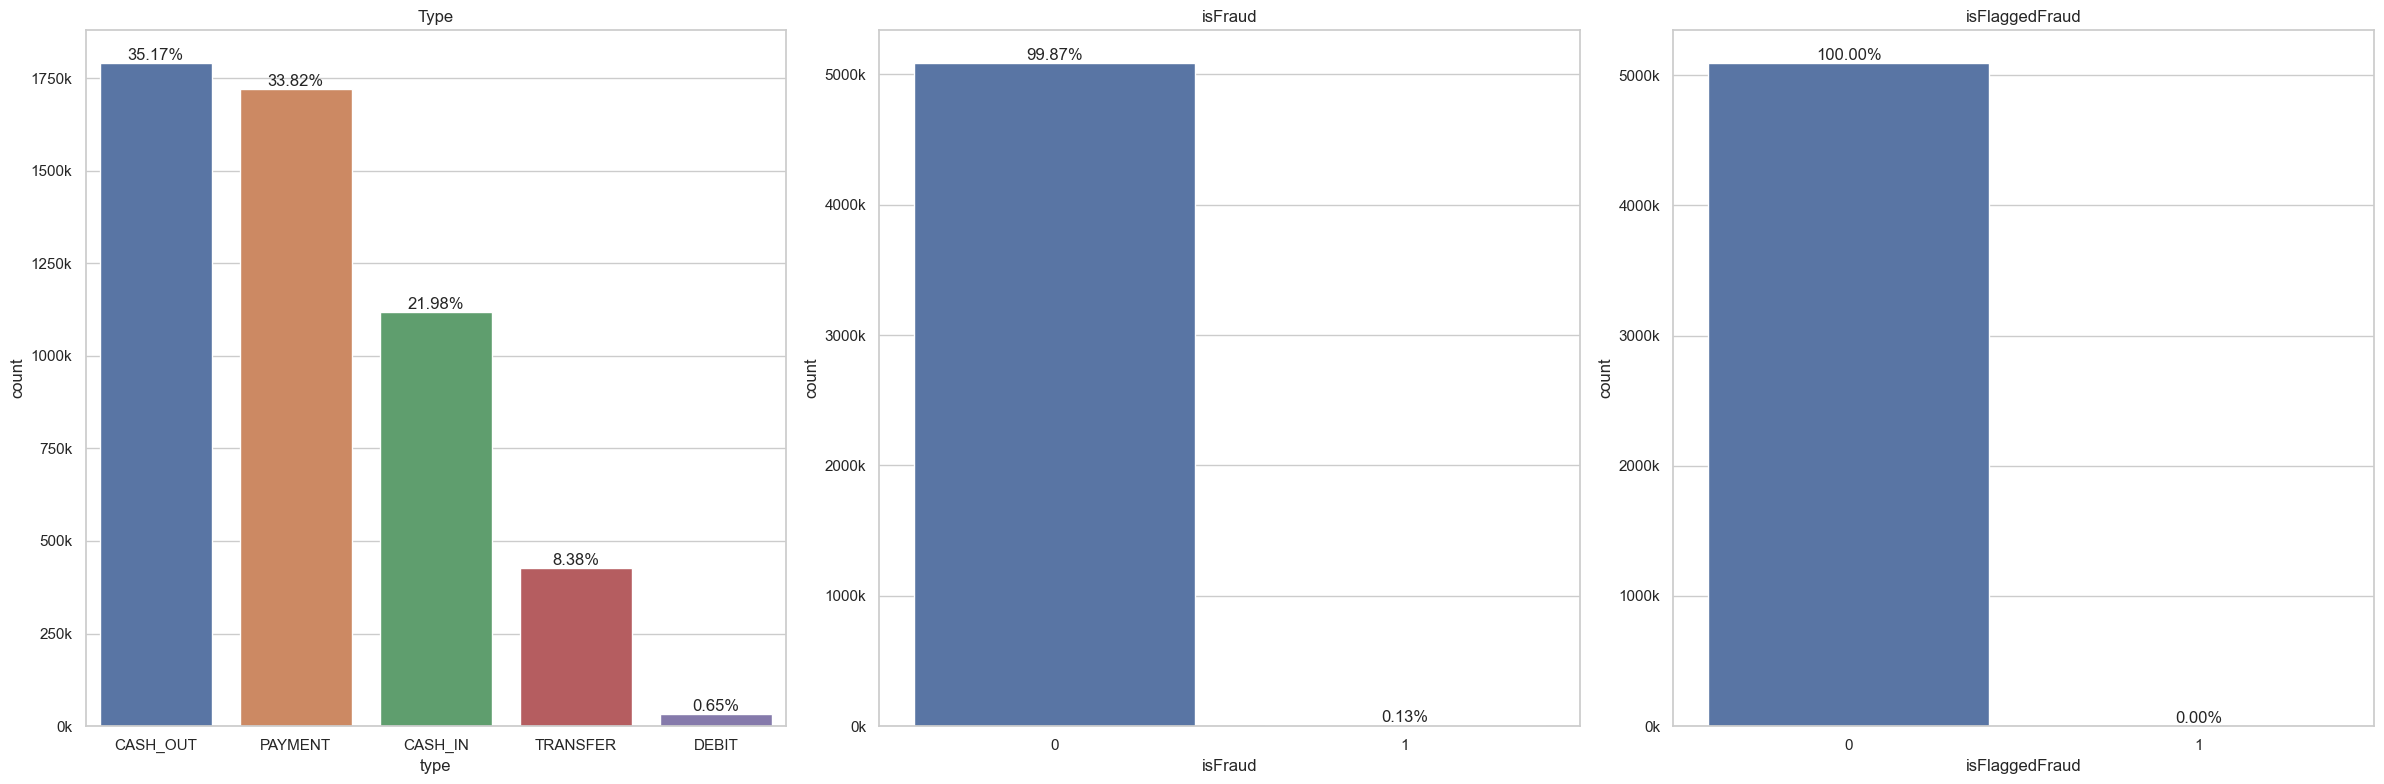

In [158]:
fig, axs = plt.subplots(1, 3, figsize=(24,8))

plot_count_percentage(df1, 'type', 'Type', axs[0])
plot_count_percentage(df1, 'isFraud', 'isFraud', axs[1])
plot_count_percentage(df1, 'isFlaggedFraud', 'isFlaggedFraud', axs[2])

plt.tight_layout()
plt.show()

In [25]:
df1_payment = df1[df1['type'] == 'PAYMENT']
df1_cash_out = df1[df1['type'] == 'CASH_OUT']
df1_cash_in = df1[df1['type'] == 'CASH_IN']
df1_transfer = df1[df1['type'] == 'TRANSFER']
df1_debit = df1[df1['type'] == 'DEBIT']

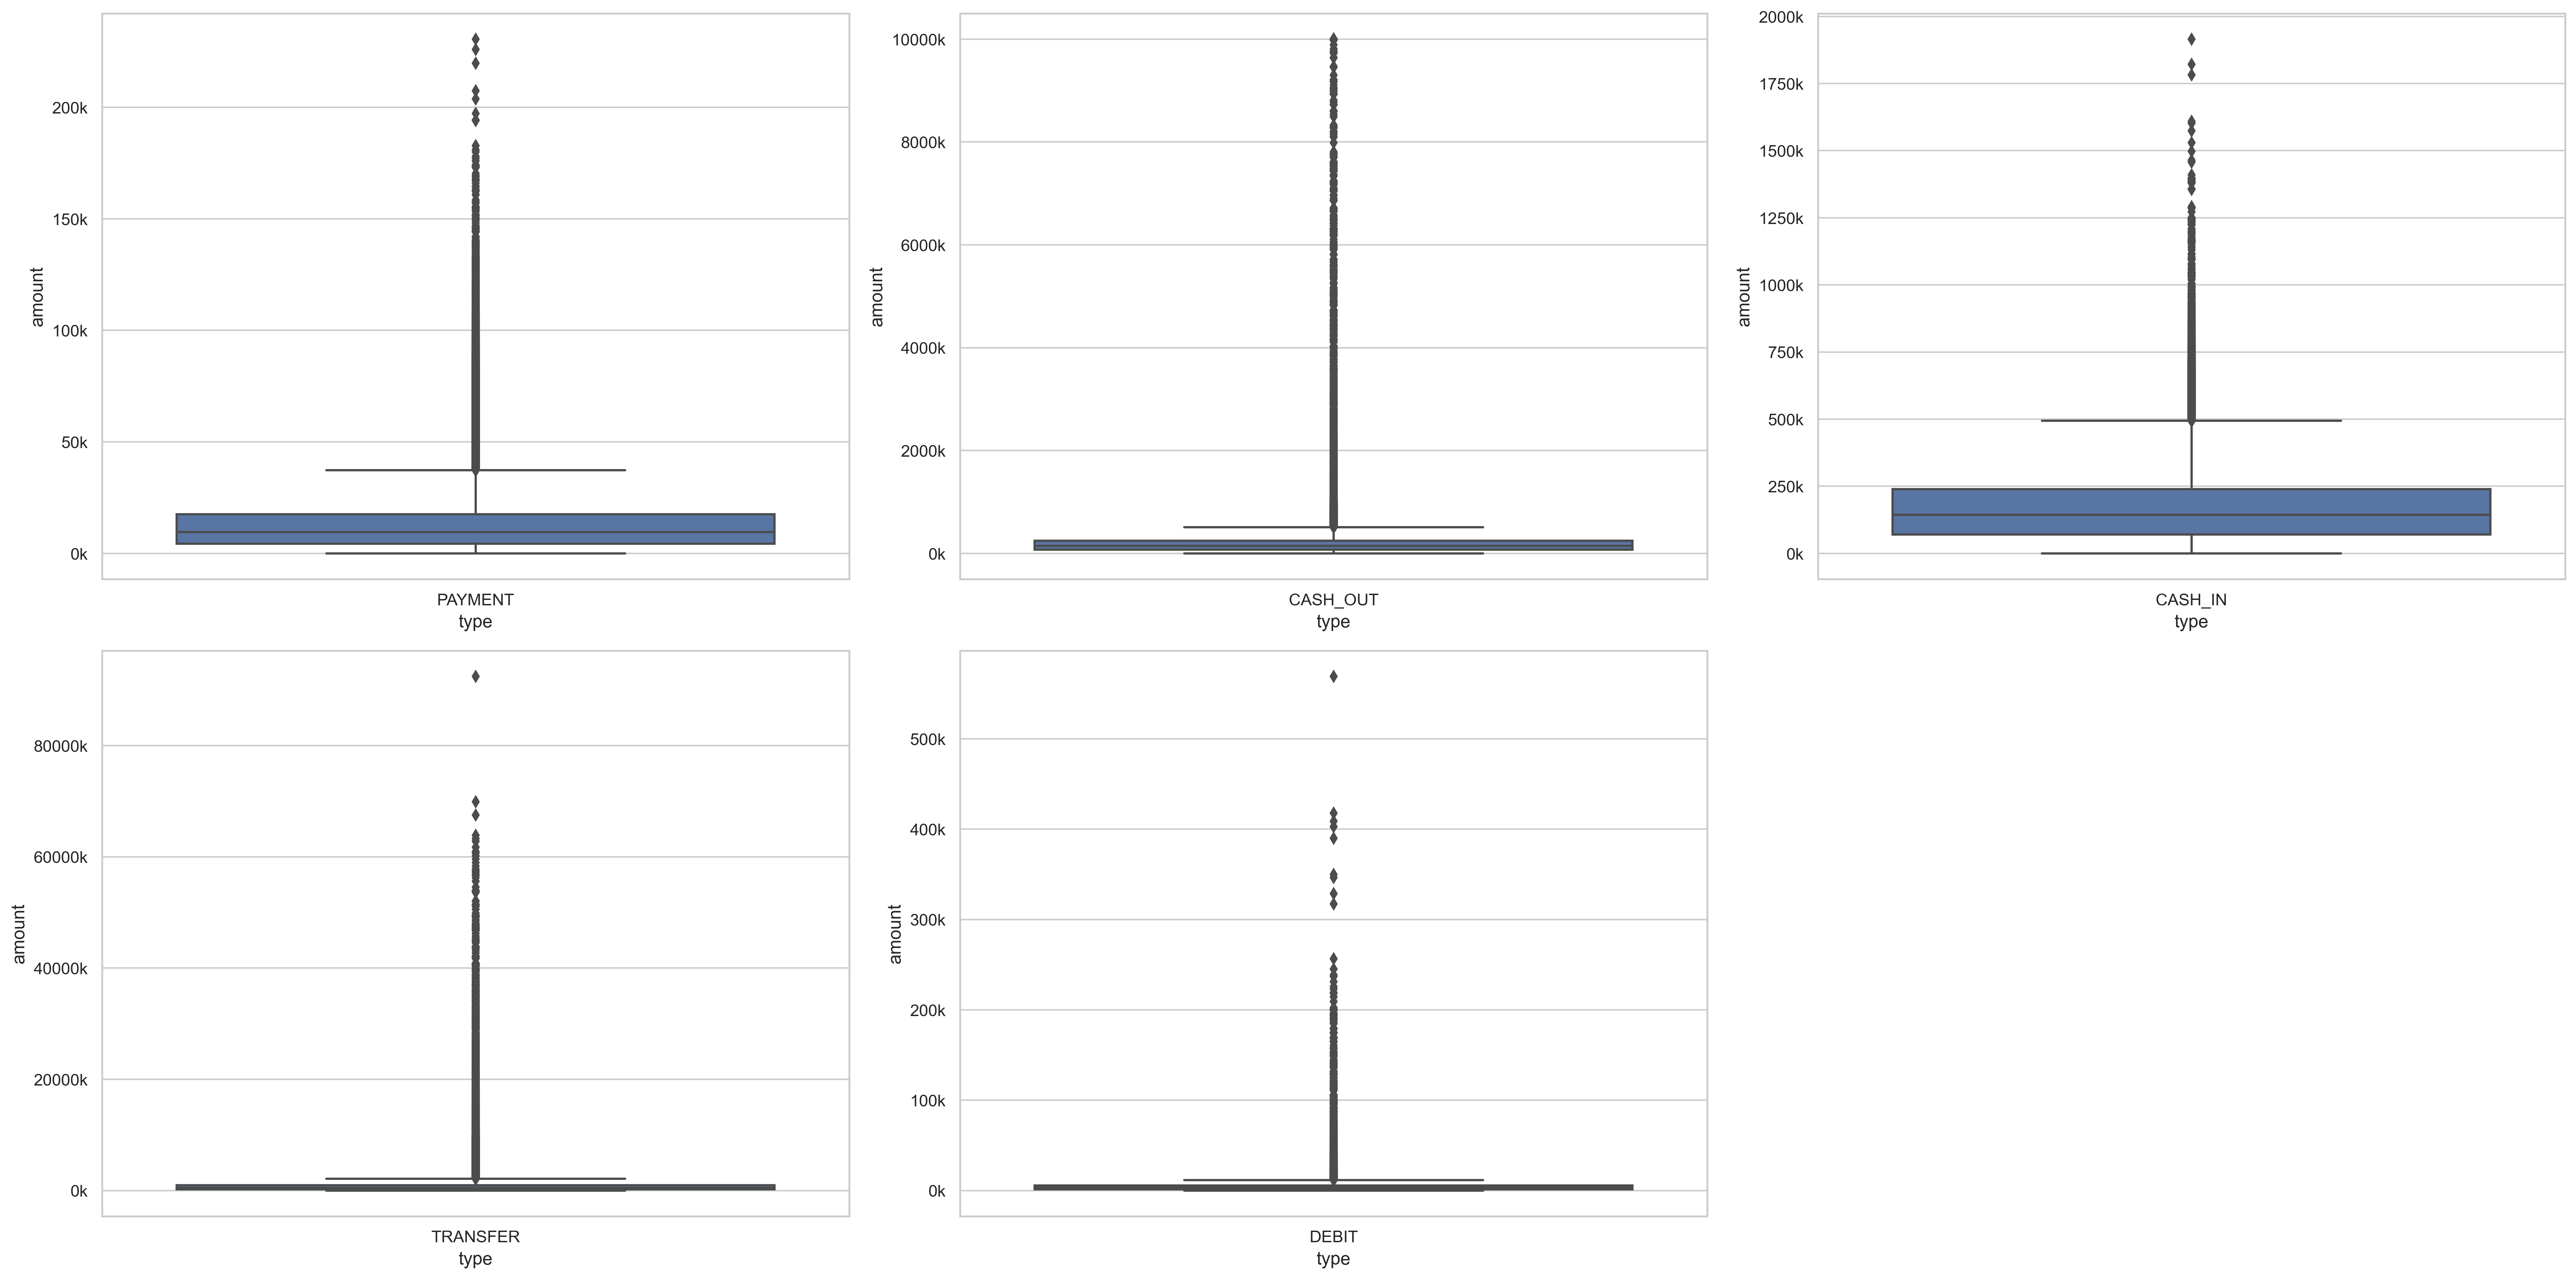

In [26]:
fig = plt.figure(figsize=(24, 12))

ax1 = fig.add_subplot(2, 3, 1)
sns.boxplot(x='type', y='amount', data=df1_payment) 
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(milhares_x))

ax2 = fig.add_subplot(2, 3, 2)
sns.boxplot(x='type', y='amount', data=df1_cash_out) 
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(milhares_x))

ax3 = fig.add_subplot(2, 3, 3)
sns.boxplot(x='type', y='amount', data=df1_cash_in) 
ax3.yaxis.set_major_formatter(mtick.FuncFormatter(milhares_x))

ax4 = fig.add_subplot(2, 3, 4)
sns.boxplot(x='type', y='amount', data=df1_transfer) 
ax4.yaxis.set_major_formatter(mtick.FuncFormatter(milhares_x))

ax5 = fig.add_subplot(2, 3, 5)
sns.boxplot(x='type', y='amount', data=df1_debit) 
ax5.yaxis.set_major_formatter(mtick.FuncFormatter(milhares_x))

plt.tight_layout()
plt.show()

In [27]:
cat_attributes['nameOrig'].value_counts()

nameOrig
C724452879     3
C1784010646    3
C1976208114    3
C2098525306    3
C1902386530    3
              ..
C1614840860    1
C964592971     1
C590958331     1
C879518006     1
C1013856770    1
Name: count, Length: 5084156, dtype: int64

In [28]:
cat_attributes['nameDest'].value_counts()

nameDest
C1590550415    94
C1286084959    87
C2083562754    86
C985934102     86
C1899073220    83
               ..
M893465911      1
M697207086      1
M792059750      1
M1133958408     1
M1721419416     1
Name: count, Length: 2266013, dtype: int64

# 2.0 - Feature Engineering

In [14]:
df2 = df1.copy()

## 2.1 - Fraud MindMap

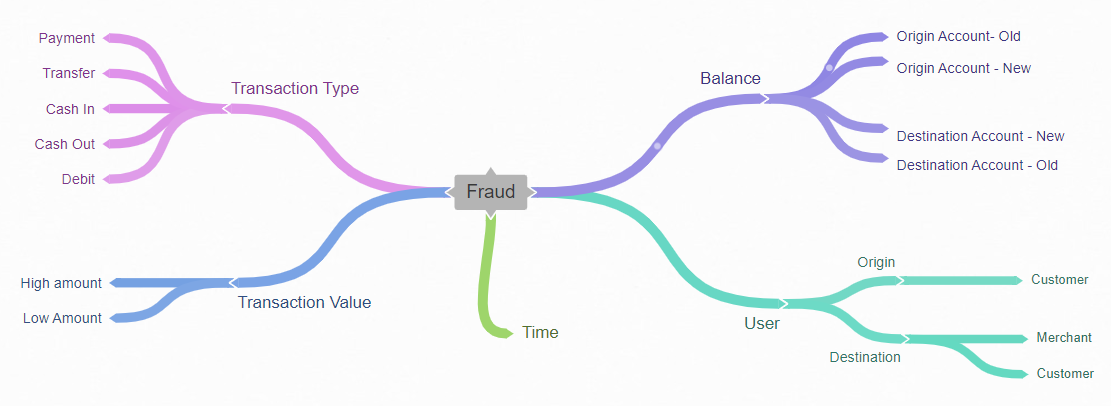

In [12]:
Image(R'C:\Users\galves\Documents\Gabriel\Ciência de dados\Cursos\new_project\blocker_fraud_company\docs\Fraud_MindMap.png')

## 2.2 - Fraud Bank Hypothesis

### 2.2.1 - Time

- H1: The majority of frauds occur in the last 5 days of the month

### 2.2.2 - Balance

- H2: The majority of frauds occur when the final balance of the origin account is 0
- H3: The majority of frauds occur when the initial balance of the origin account is above 200,000
- H4: The majority of frauds occur when the final balance of the destination account is 0
- H5: The majority of frauds occur when the initial balance of the destination account is above 2,000,000

### 2.2.3 - User

- H6: Most frauds occur when the transaction amount is different from the balance variation

### 2.2.4 - Transaction type

- H7: The majority of frauds occur with transfers or cash out

### 2.2.5 - Transaction Value

- H8: The majority of frauds occur with values above 1,000,000

### 2.2.6 - Final List

- H1: The majority of frauds occur in the last 5 days of the month
- H2: The majority of frauds occur when the final balance of the origin account is 0
- H3: The majority of frauds occur when the initial balance of the origin account is above 200,000
- H4: The majority of frauds occur when the final balance of the destination account is 0
- H5: The majority of frauds occur when the initial balance of the destination account is above 2,000,000
- H6: The majority of frauds occur when the transaction amount is different from the balance variation
- H7: The majority of frauds occur with transfers or withdrawals
- H8: The majority of frauds occur with values above 1,000,000

## 2.3 - Engineering New Features

In [15]:
# creating feature - 'day'
df2['day'] = ((df2['step'] - 1) // 24) + 1

In [16]:
# creating features for the number of transactions by nameOrig and nameDest
qtde_transações_nameOrig = df2[['nameOrig']].groupby('nameOrig').size().reset_index(name='nameOrigtransactionscount')
qtde_transações_nameDest = df2[['nameDest']].groupby('nameDest').size().reset_index(name='nameDesttransactionscount')

df2 = df2.merge(qtde_transações_nameOrig, how='left', on='nameOrig')
df2 = df2.merge(qtde_transações_nameDest, how='left', on='nameDest')

In [ ]:
#Creating feature of balance variation
df2['balancevariationOrig'] = df2.apply(lambda x: x['newbalanceOrig'] - x['oldbalanceOrg'], axis=1)
df2['balancevariationDest'] = df2.apply(lambda x: x['newbalanceDest'] - x['oldbalanceDest'], axis=1)

In [ ]:
#Creating feature amountXbalancevariationOrig and amountXbalancevariationDest
df2['amountEqualbalancevariationOrig'] = (abs(round(df2['amount'], 2) + round(df2['balancevariationOrig'], 2)) <= 0.02).astype(int)
df2['amountEqualbalancevariationDest'] = (abs(round(df2['amount'], 2) + round(-df2['balancevariationDest'], 2)) <= 0.02).astype(int)

#CASH_IN generates an 'amountEqualbalancevariation' with opposite signal to the other transaction types
cash_in = df2['type'] == "CASH_IN"
df2.loc[cash_in, 'amountEqualbalancevariationOrig'] = (abs(round(df2.loc[cash_in, 'amount'], 2) + round(-df2.loc[cash_in, 'balancevariationOrig'], 2)) <= 0.02).astype(int)
df2.loc[cash_in, 'amountEqualbalancevariationDest'] = (abs(round(df2.loc[cash_in, 'amount'], 2) + round(df2.loc[cash_in, 'balancevariationDest'], 2)) <= 0.02).astype(int)

In [ ]:
#Creating feature MerchantDest
df2['MerchantDest'] = df2['nameDest'].apply(lambda x: 1 if 'M' in x else 0)

In [ ]:
# Reorganizing the dataframe columns
df2 = df2[['step', 'day', 'type', 'amount', 
          'nameOrig', 'nameOrigtransactionscount', 'oldbalanceOrg', 'newbalanceOrig', 'balancevariationOrig', 'amountEqualbalancevariationOrig', 
          'nameDest', 'nameDesttransactionscount', 'oldbalanceDest', 'newbalanceDest', 'balancevariationDest', 'amountEqualbalancevariationDest', 'MerchantDest', 
          'isFlaggedFraud', 'isFraud']]

In [ ]:
#changing to int64 type
df2['amountEqualbalancevariationOrig'] = df2['amountEqualbalancevariationOrig'].astype('int64')
df2['amountEqualbalancevariationDest'] = df2['amountEqualbalancevariationDest'].astype('int64')

# 3.0 - Variable Filtering

In [ ]:
df3 = df2.copy()

In [ ]:
aux = df3[(df3['oldbalanceOrg'] == 0) & (df3['newbalanceOrig'] == 0)]
aux_type = aux['type'].unique()
aux_count = aux.shape[0]
print(f'There are {aux_count} transactions of type {aux_type} that have all of the origin balances equal to 0')

aux1 = df3[(df3['oldbalanceDest'] == 0) & (df3['newbalanceDest'] == 0)]
aux1_type = aux1['type'].unique()
aux1_count = aux1.shape[0]
print(f'There are {aux1_count} transactions of type {aux1_type} that have all of the destination balances equal to 0')

aux2 = aux[(aux['oldbalanceDest'] == 0) & (aux['newbalanceDest'] == 0)]
aux2_type = aux2['type'].unique()
aux2_count = aux2.shape[0]
print(f'There are {aux2_count} transactions of type {aux2_type} that have all balances equal to 0')


print('As I could not determine whether this is normal for this type of mobile money transactions, I decided to keep the rows')

In [ ]:
# Removing rows where Amount is 0
aux = df3[df3['amount'] == 0].shape[0]
print(f'Number of rows where amount equals "0": {aux}')

df3 = df3[df3['amount'] != 0]

### I will not remove any outliers due to their importance in indicating frauds

# 4.0 - Exploratory Data Analysis

In [ ]:
df4 = df3.copy()

## 4.1 - Univariate Analysis

### 4.1.1 - Response variable

- We will use the 'isFlaggedFraud' column to study how a massive transfer control can identify frauds, even though we know that this control alone is too simple for fraud classification.

In [29]:
n_fraud = df_raw[df_raw['isFraud'] != 0].shape[0]
percent_fraud = n_fraud/df1.shape[0]

n_flagged_fraud = df1[df1['isFlaggedFraud'] != 0].shape[0]
percent_flagged_fraud = n_flagged_fraud/df1.shape[0]

df_fraud = pd.DataFrame({'' : ['isFraud', 'isFlaggedFraud'],
                         'Total number' : [n_fraud, n_flagged_fraud],
                         '%' : [percent_fraud, percent_flagged_fraud]})

df_fraud['%'] = df_fraud['%'].apply(lambda x: '{:.4f}%'.format(x * 100))


df_fraud

,,Total number,%
0,isFraud,8213,0.1614%
1,isFlaggedFraud,16,0.0003%


In [30]:
isFraud = df1['isFraud']
isFlaggedFraud = df1['isFlaggedFraud']
matrix_confusion = confusion_matrix(isFraud, isFlaggedFraud)
matrix_confusion

array([[5083526,       0],
       [   6554,      16]], dtype=int64)

In [31]:
scores(isFraud, isFlaggedFraud)

,Score,Valor
0,Accuracy,99.87%
1,Precisão,100.00%
2,Recall,0.24%
3,F1,0.49%
4,ROC AUC,50.12%


- Previous model scores demonstrate how frauds were being ranked poorly,

#### Accuracy Score: 99.87%   
- NOT A GOOD PARAMETER FOR THIS ANALYSIS, as the high value is due to the imbalanced dataset.

#### Precision Score: 100.00% 
- NOT A GOOD PARAMETER FOR THIS ANALYSIS, although these 100% indicate that the 13 flagged transfers were indeed frauds, this criterion of high transfers failed to identify 6,580 frauds.
    
#### Recall Score     0.20%
- Represents how ineffective this fraud detection parameter was, as it failed to identify 99.80% of the frauds.

### 4.1.2 - Numerical Attributes

In [90]:
num_attributes = df4.select_dtypes(include=['int64', 'float64'])
cat_attributes = df4.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [44]:
descriptive_statistics(num_attributes)

,attributes,range,media,mediana,std,skew,kurtosis,min,25%,50%,75%,90%,99%,max
0,step,742.00,243.36,239.00,142.32,0.38,0.33,1.00,155.00,239.00,335.00,399.00,681.00,743.00
1,day,30.00,10.49,10.00,5.92,0.38,0.33,1.00,7.00,10.00,14.00,17.00,29.00,31.00
2,amount,"92,445,516.63","179,910.03","74,841.61","602,458.48",30.51,"1,736.80",0.01,"13,391.10","74,841.61","208,683.47","365,448.80","1,617,619.97","92,445,516.64"
3,nameOrigtransactionscount,2.00,1.00,1.00,0.05,20.72,430.47,1.00,1.00,1.00,1.00,1.00,1.00,3.00
4,oldbalanceOrg,"59,585,040.37","833,747.01","14,212.20","2,887,604.50",5.25,32.98,0.00,0.00,"14,212.20","107,338.80","1,820,855.52","16,024,049.82","59,585,040.37"
5,newbalanceOrig,"49,585,040.37","854,948.31",0.00,"2,923,389.69",5.18,32.07,0.00,0.00,0.00,"144,169.48","1,969,225.97","16,172,087.38","49,585,040.37"
6,balancevariationOrig,"11,915,267.90","21,201.30",0.00,"146,601.69",-24.60,"1,506.97","-10,000,000.00","-10,151.00",0.00,0.00,"157,906.79","421,194.26","1,915,267.90"
7,amountEqualbalancevariationOrig,1.00,0.43,0.00,0.50,0.27,-1.93,0.00,0.00,0.00,1.00,1.00,1.00,1.00
8,nameDesttransactionscount,93.00,9.16,6.00,10.00,1.50,2.48,1.00,1.00,6.00,14.00,24.00,41.00,94.00
9,oldbalanceDest,"356,015,889.35","1,100,383.47","132,801.46","3,403,516.96",20.11,964.98,0.00,0.00,"132,801.46","943,152.39","2,913,786.28","12,375,855.48","356,015,889.35"


In [130]:
aux = df4[['nameOrigtransactionscount', 'nameOrig']].groupby('nameOrig').mean().reset_index()
aux['nameOrigtransactionscount'].value_counts(normalize=True)

nameOrigtransactionscount
1.0    0.998833
2.0    0.001166
3.0    0.000001
Name: proportion, dtype: float64

In [136]:
df4['amountEqualbalancevariationOrig'].value_counts(normalize=True )

amountEqualbalancevariationOrig
0    0.566079
1    0.433921
Name: proportion, dtype: float64

In [137]:
df4['amountEqualbalancevariationDest'].value_counts(normalize=True )

amountEqualbalancevariationDest
1    0.561155
0    0.438845
Name: proportion, dtype: float64

In [142]:
df4['MerchantDest'].value_counts(normalize=True )

MerchantDest
0    0.661846
1    0.338154
Name: proportion, dtype: float64

([<matplotlib.axis.XTick at 0x1d330ec3400>,
 [Text(0, 0, '0m'), Text(1, 0, '0m')])

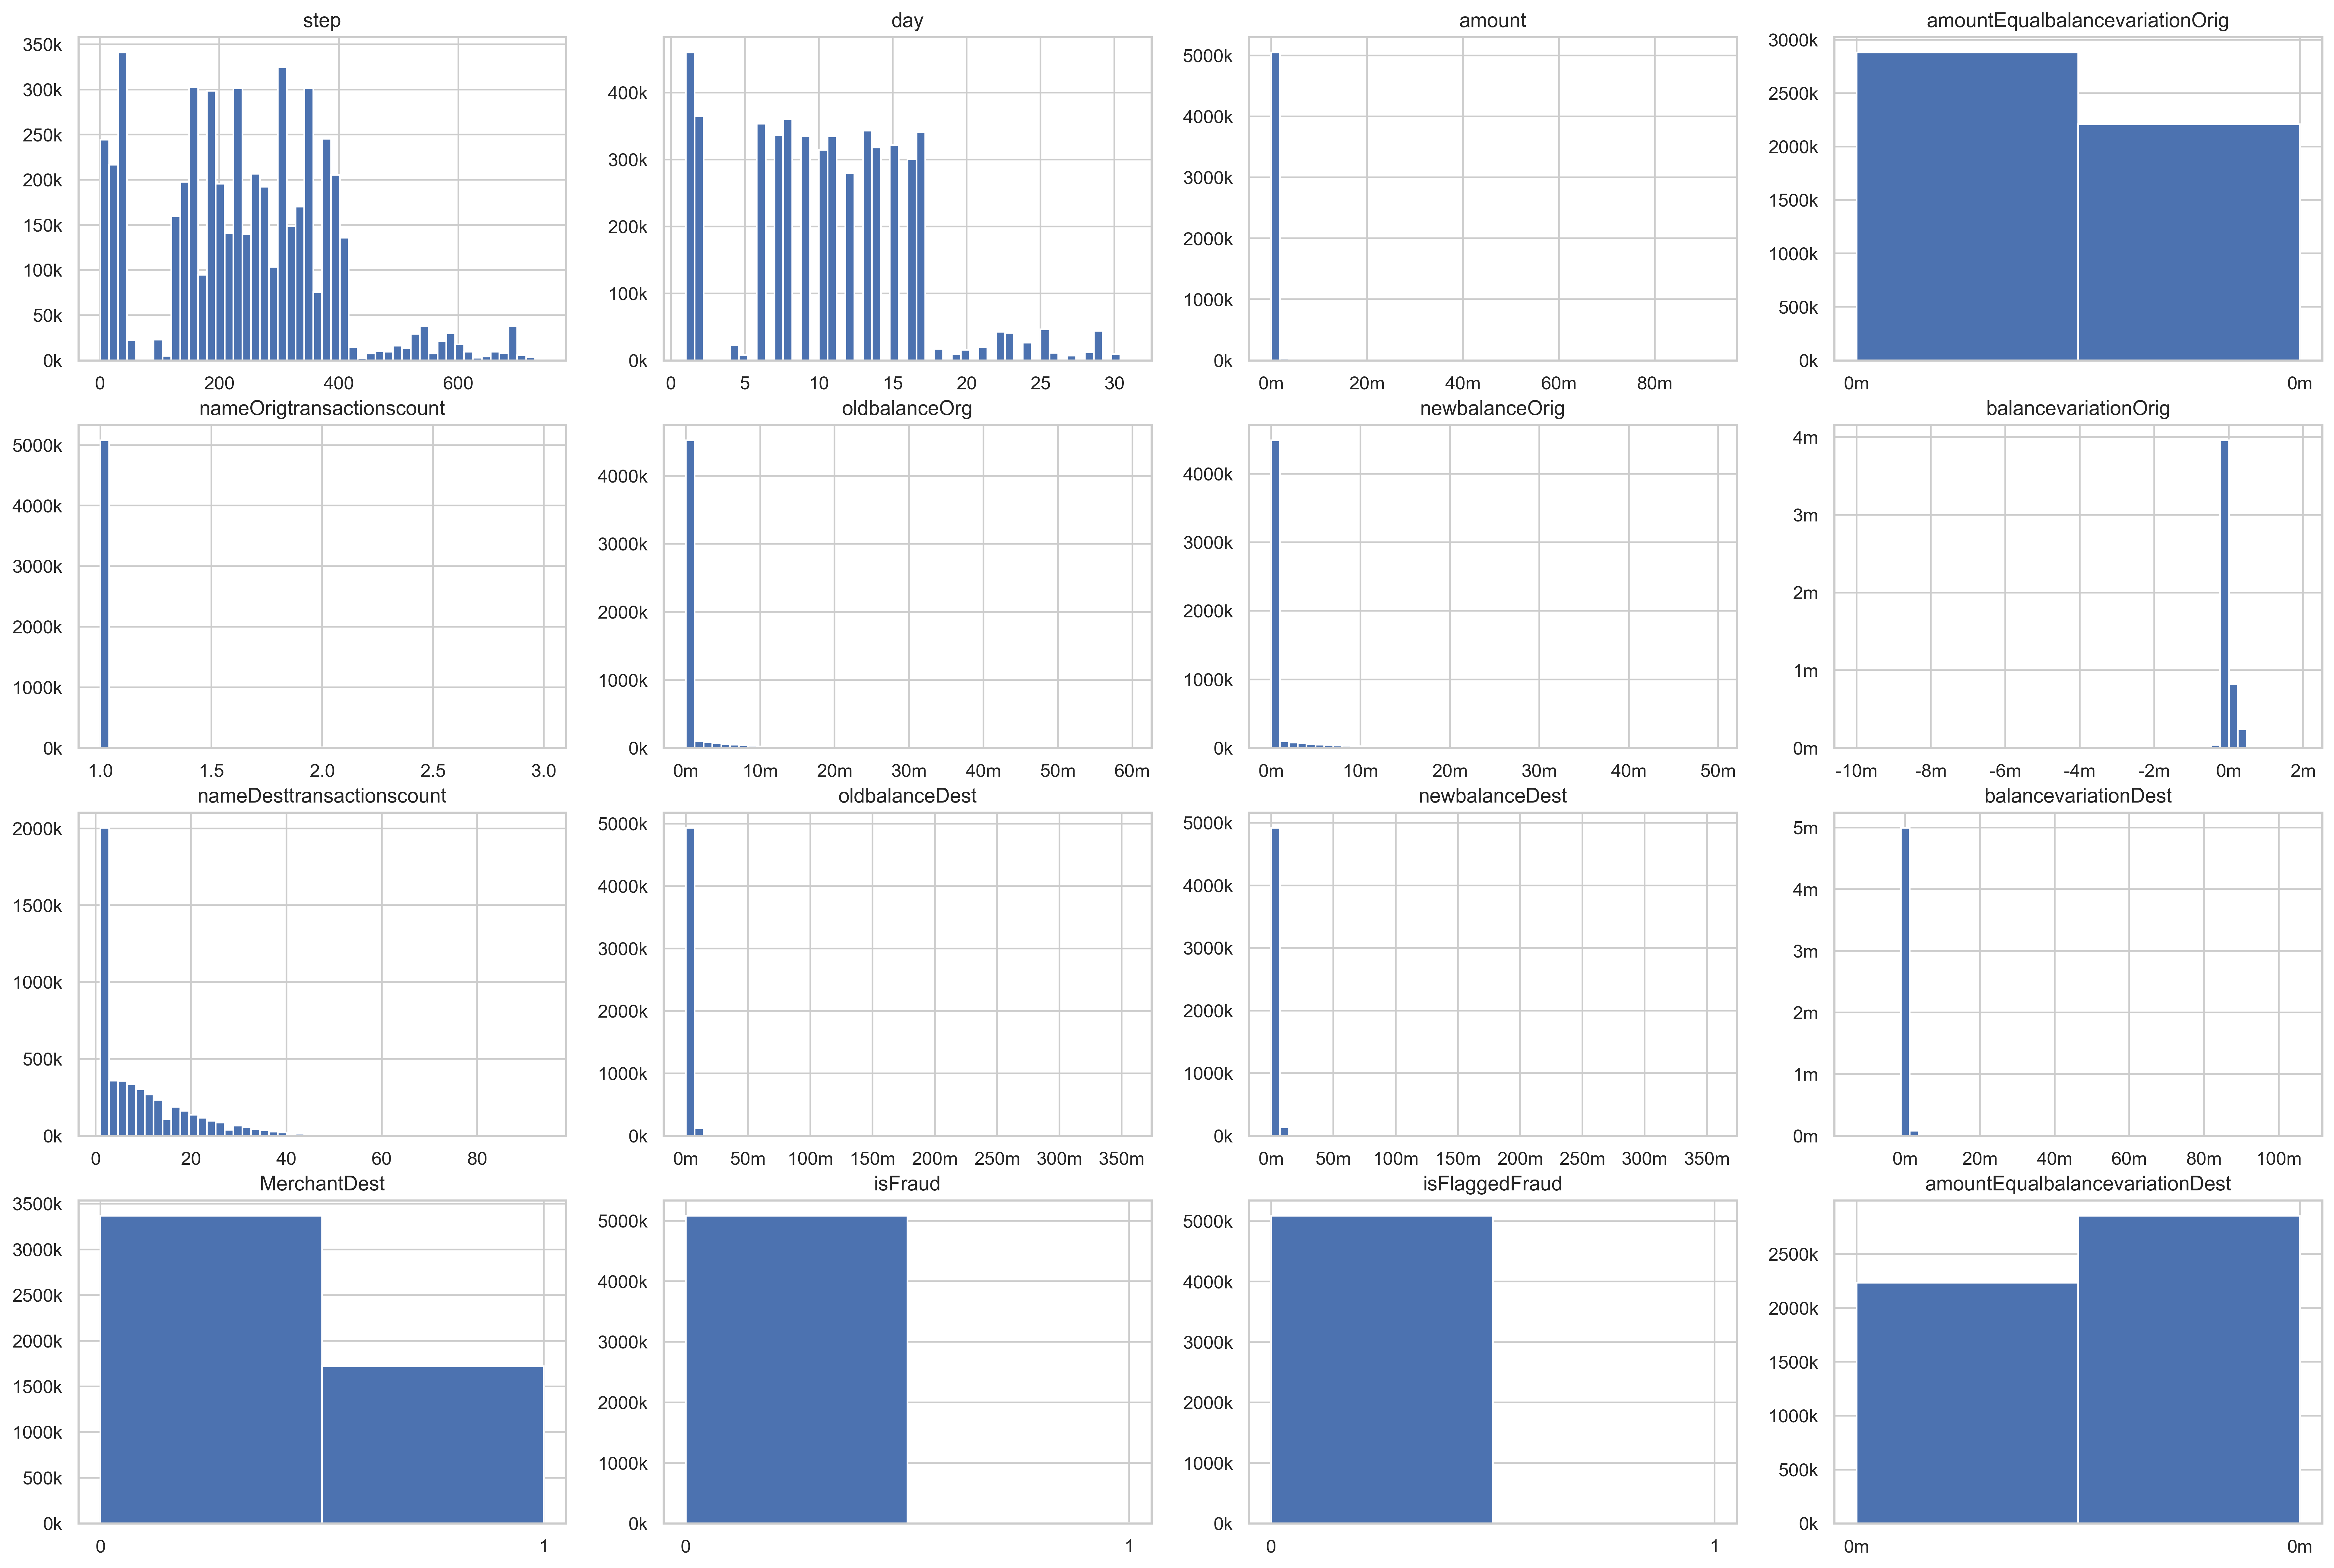

In [107]:
plt.subplot(4, 4, 1)
num_attributes['step'].hist(bins= 50, figsize=(24,16))
plt.ticklabel_format(style = 'plain')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("step")

plt.subplot(4, 4, 2)
num_attributes['day'].hist(bins= 50, figsize=(24,16))
plt.ticklabel_format(style = 'plain')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("day")

plt.subplot(4, 4, 3)
num_attributes['amount'].hist(bins=50, figsize=(24,16))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("amount")

plt.subplot(4, 4, 4)
num_attributes['amountEqualbalancevariationOrig'].hist(bins=2, figsize=(24,16))
plt.ticklabel_format(style = 'plain')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("amountEqualbalancevariationOrig")
plt.xticks([0, 1])

plt.subplot(4, 4, 5)
num_attributes['nameOrigtransactionscount'].hist(bins=50, figsize=(24,16))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("nameOrigtransactionscount")

plt.subplot(4, 4, 6)
num_attributes['oldbalanceOrg'].hist(bins=50, figsize=(24,16))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("oldbalanceOrg")

plt.subplot(4, 4, 7)
num_attributes['newbalanceOrig'].hist(bins=50, figsize=(24,16))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("newbalanceOrig")

plt.subplot(4, 4, 8)
num_attributes['balancevariationOrig'].hist(bins=50, figsize=(24,16))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhoes_y))
plt.title("balancevariationOrig")

plt.subplot(4, 4, 9)
num_attributes['nameDesttransactionscount'].hist(bins=50, figsize=(24,16))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("nameDesttransactionscount")

plt.subplot(4, 4, 10)
num_attributes['oldbalanceDest'].hist(bins=50, figsize=(24,16))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("oldbalanceDest")

plt.subplot(4, 4, 11)
num_attributes['newbalanceDest'].hist(bins=50, figsize=(24,16))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("newbalanceDest")

plt.subplot(4, 4, 12)
num_attributes['balancevariationDest'].hist(bins=50, figsize=(24,16))
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhoes_y))
plt.title("balancevariationDest")

plt.subplot(4, 4, 13)
num_attributes['MerchantDest'].hist(bins=2, figsize=(24,16))
plt.ticklabel_format(style = 'plain')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("MerchantDest")
plt.xticks([0, 1])

plt.subplot(4, 4, 14)
num_attributes['isFraud'].hist(bins=2, figsize=(24,16))
plt.ticklabel_format(style = 'plain')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("isFraud")
plt.xticks([0, 1])

plt.subplot(4, 4, 15)
num_attributes['isFlaggedFraud'].hist(bins=2, figsize=(24,16))
plt.ticklabel_format(style = 'plain')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("isFlaggedFraud")
plt.xticks([0, 1])

plt.subplot(4, 4, 16)
num_attributes['amountEqualbalancevariationDest'].hist(bins=2, figsize=(24,16))
plt.ticklabel_format(style = 'plain')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(milhoes_x))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhares_y))
plt.title("amountEqualbalancevariationDest")
plt.xticks([0, 1])

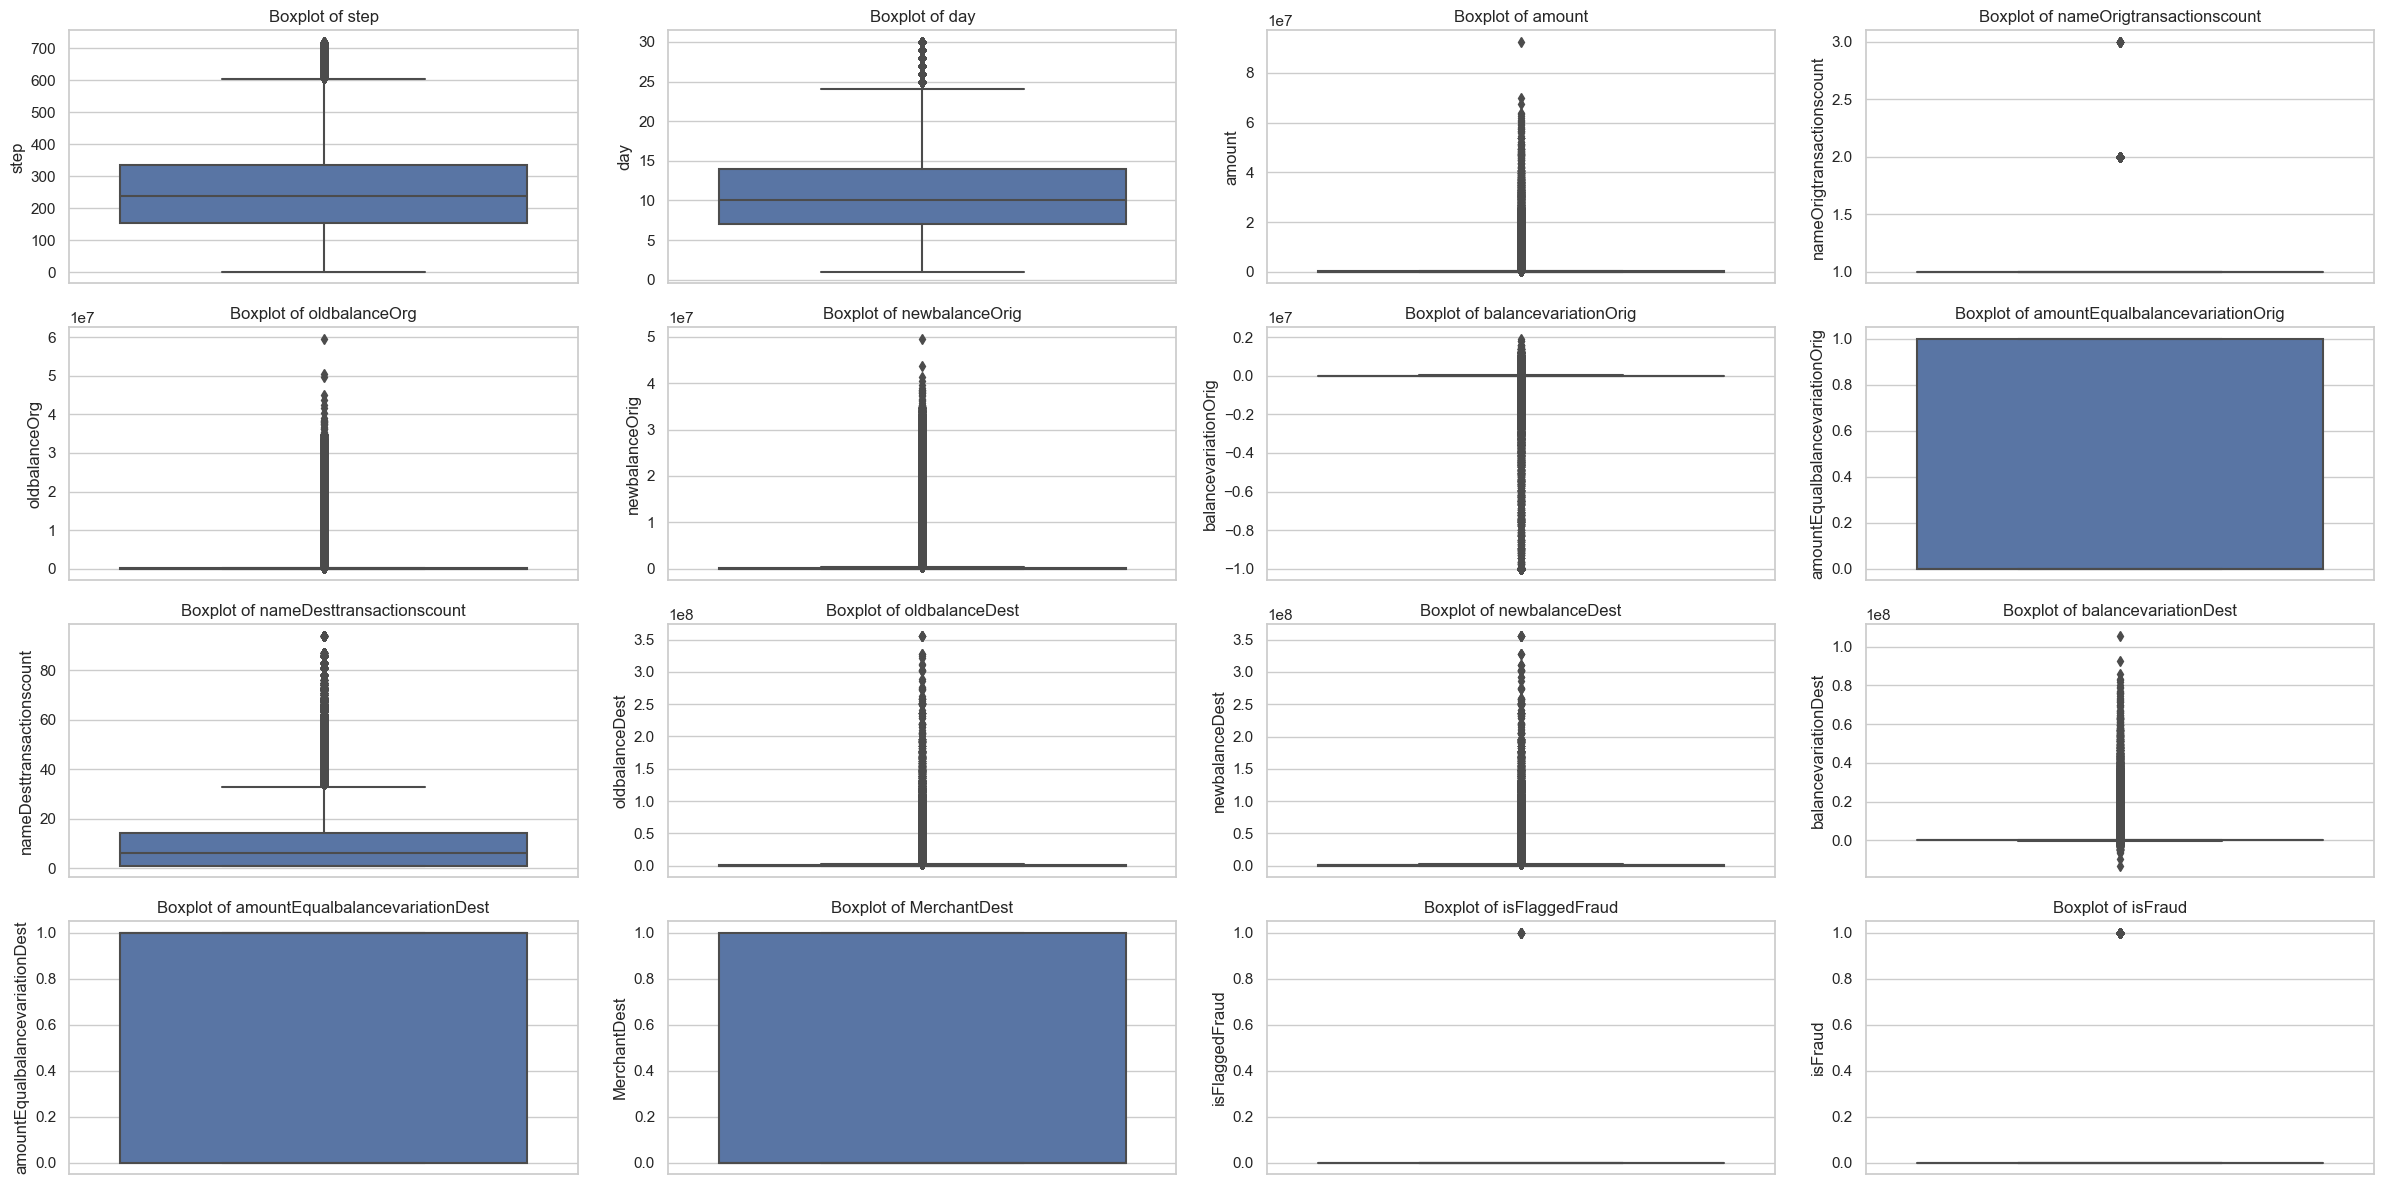

In [108]:
# Boxplots
plot_boxplots(df5, num_cols=4, num_rows=4, figsize=(24, 12))

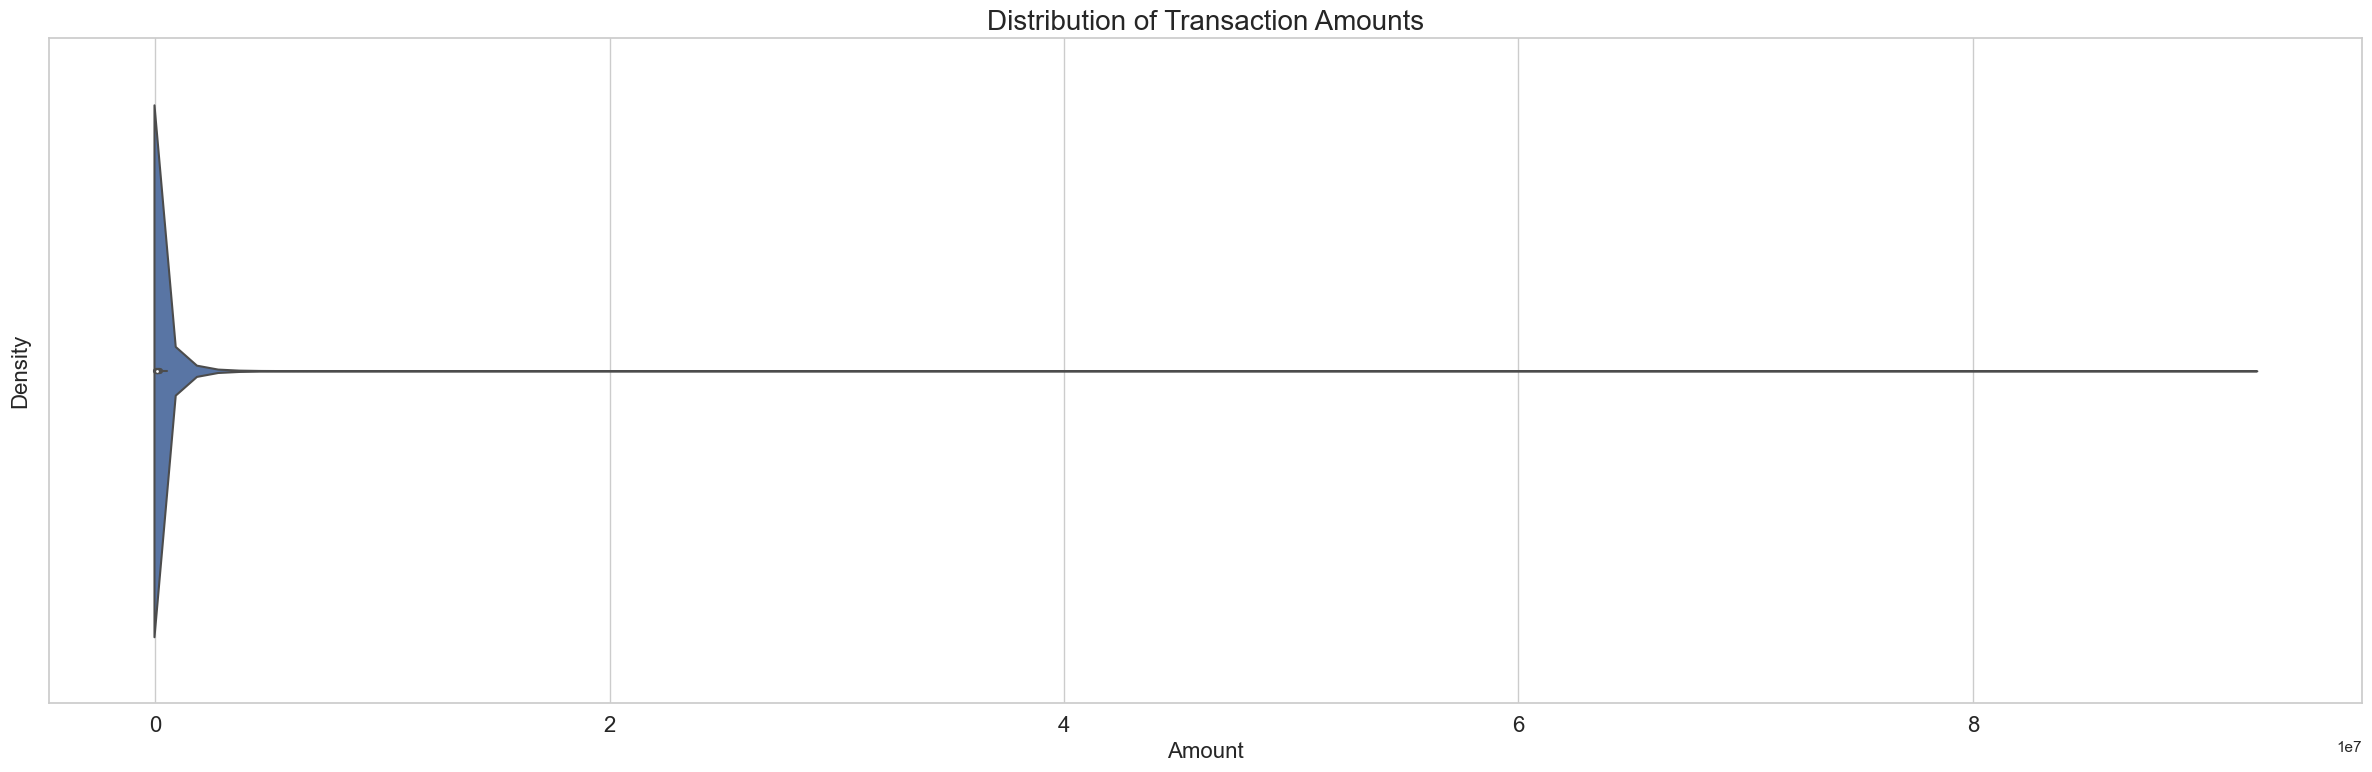

In [41]:
plt.rcParams['font.size'] = 16
fig, ax = plt.subplots(figsize=(24,8))
sns.violinplot(x='amount', data=df4, ax=ax)
ax.set_title('Distribution of Transaction Amounts', fontsize=20)
ax.set_xlabel('Amount', fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
plt.tight_layout()
plt.show()

#### 4.1.2.1 - Feature 'day'

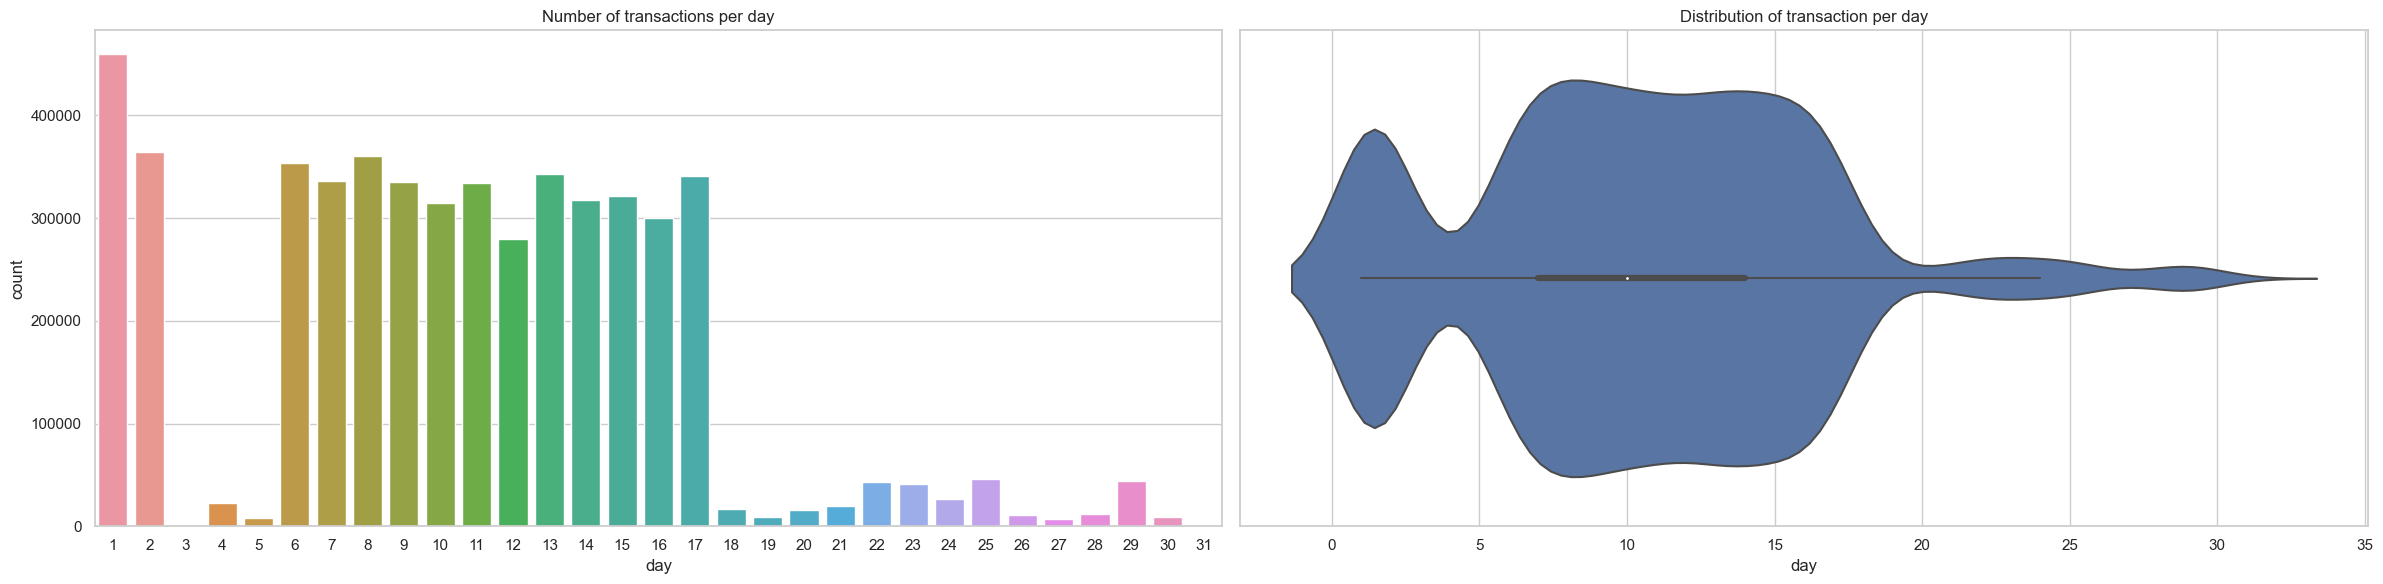

In [76]:
fig, axs = plt.subplots(ncols=2, figsize=(24, 6))
sns.countplot(x='day', data=df4, ax=axs[0])
axs[0].set_title('Number of transactions per day')
sns.violinplot(x='day', data=df4, bw=0.2, ax=axs[1])
axs[1].set_title('Distribution of transaction per day')
plt.tight_layout()
plt.show()

In [108]:
aux = ~df4['day'].isin([1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
df_most_transactions = df4.loc[aux,:]

result = (df_most_transactions.shape[0] / df4.shape[0])
result = result * 100
result = round(float(result), 2) 
print(f'Apenas {result}% das transações acontecem nos dias 3, 4, 5 e do dia 18 até o final do mês')

Apenas 6.51% das transações acontecem nos dias 3, 4, 5 e do dia 18 até o final do mês


- Amount         -  1% das transação variam de 1,6m a 92,4m
- oldbalanceOrg  - 10% das transação variam de 1,8m a 59,5m
- newbalanceOrig - 10% das transação variam de 1,9m a 49,5m
- oldbalanceDest - 10% das transação variam de 2,9m a 356m
- newbalanceDest - 10% das transação variam de 3,1m a 356m

- nameOrigtransactionscount       - Apenas 0,12% dos clientes fizeram mais de 1 transação
- amountEqualbalancevariationOrig - 56% das transação posuem uma variação do balanço diferente do valor da transação
- amountEqualbalancevariationDest - 43% das transação posuem uma variação do balanço diferente do valor da transação 

- MerchantDest - 33,8% das transações são realizadas com Merchant como destinatário

### 4.1.3 - Categorical Attributes

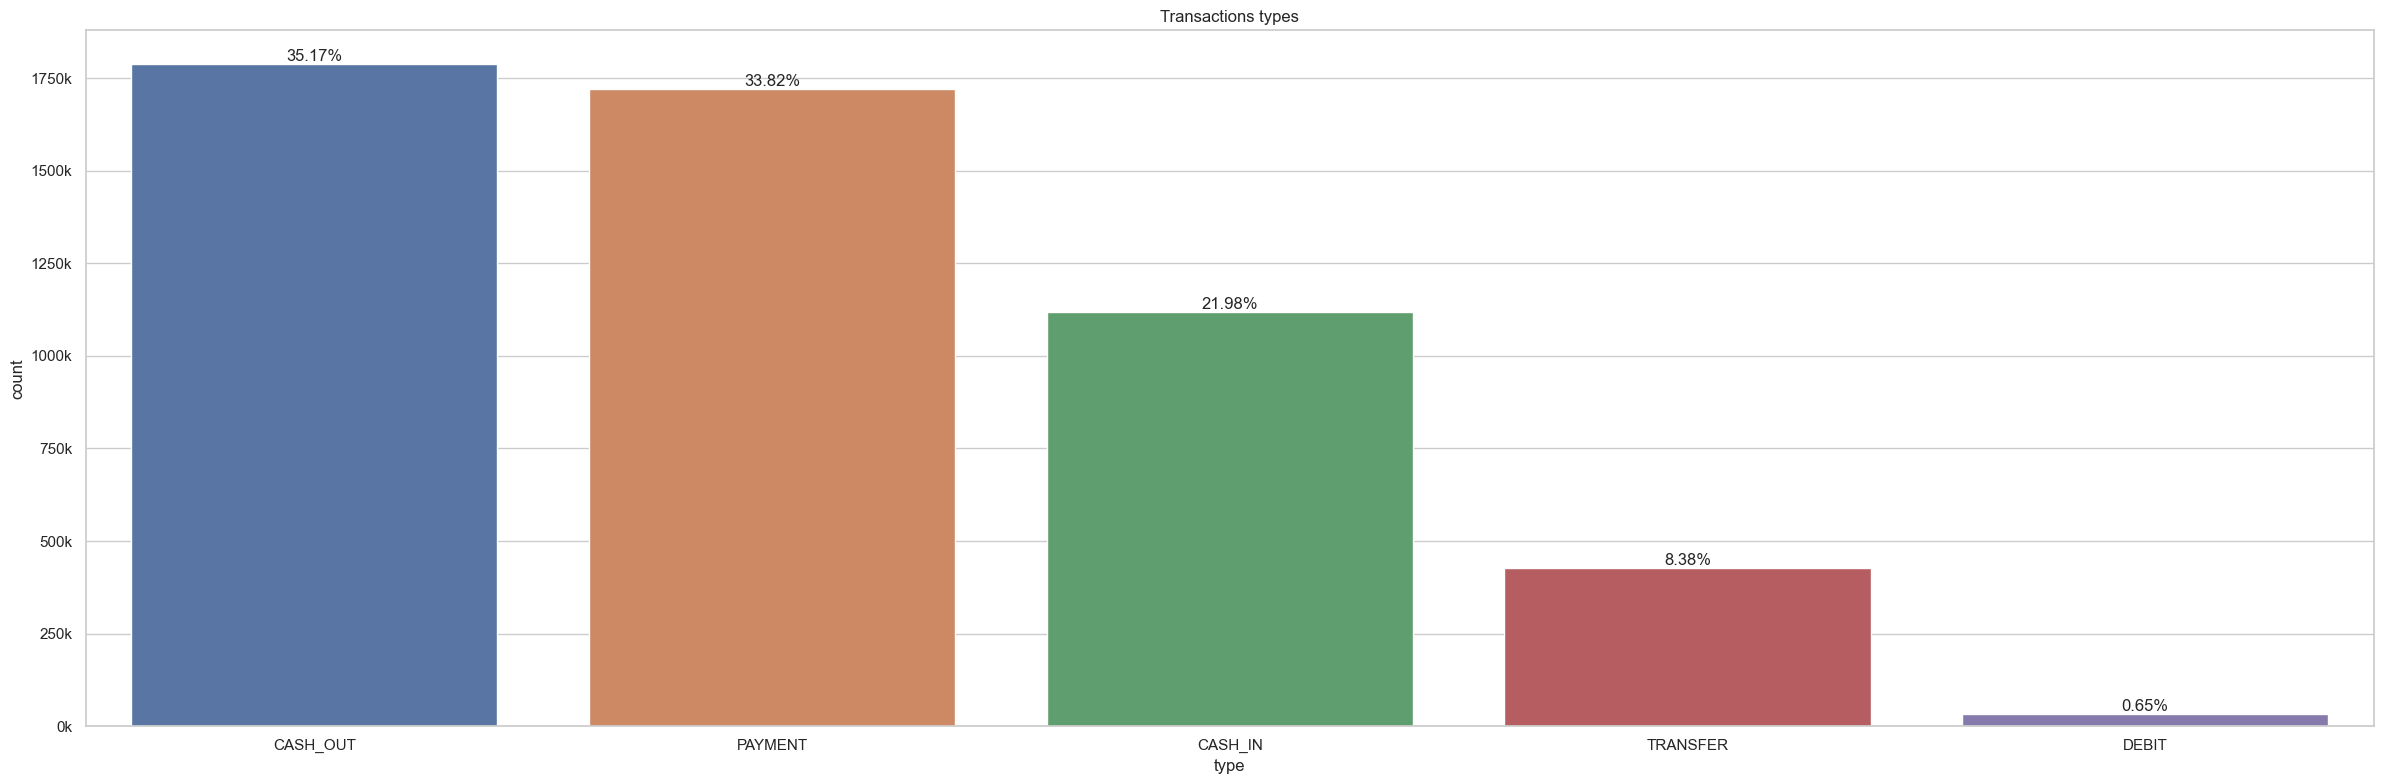

In [157]:
fig, ax = plt.subplots(figsize=(24,8))
plot_count_percentage(df4, 'type', 'Transactions types', ax=ax)
plt.tight_layout()
plt.show()

## 4.2 - Bivariate Analysis

### 4.1.1 - Fraud by Amount

In [1]:
plt.subplots(figsize=(24,8))
sns.scatterplot(x='step', y='amount', hue='isFraud', data=df4) 

NameError: name 'plt' is not defined

### 4.1.2 - Fraud by Type

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

aux = df4.groupby('type').agg(Fraud_count=('isFraud', 'sum'), Type_count=('isFraud', 'count')).reset_index()
aux['Fraud_rate'] = aux['Fraud_count'] / aux['Type_count'] * 100

ax1.bar(x=aux['type'], height=aux['Fraud_rate'], color=['r', 'g', 'r', 'r', 'b'])
ax1.set_title('Fraud rate by transactions', fontsize=16)
ax1.set_ylabel('Fraud rate')

for i, value in enumerate(aux['Fraud_rate']):
    ax1.text(i, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=14)

aux2 = df4.groupby('type').agg(Fraud_rate=('isFraud', 'sum')).reset_index()
aux2['Fraud_rate'] = aux2['Fraud_rate'] / aux2['Fraud_rate'].sum() * 100

ax2.bar(x=aux2['type'], height=aux2['Fraud_rate'], color=['r', 'g', 'r', 'r', 'b'])
ax2.set_title('Fraud rate by type of transactions', fontsize=16)
ax2.set_ylabel('Fraud rate')

for i, value in enumerate(aux2['Fraud_rate']):
    ax2.text(i, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=14)
    
plt.show()

### 4.1.3 - Fraud by Day

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 10))
palette = sns.color_palette("Blues", 5)

aux = df4.groupby('day').agg(Fraud_count=('isFraud', 'sum'), Day_count=('isFraud', 'count')).reset_index()
aux['Fraud_rate'] = aux['Fraud_count'] / aux['Day_count'] * 100

ax1.bar(x=aux['day'], height=aux['Fraud_rate'], color=palette)
ax1.set_title('Fraud rate by day - Total number of transactions', fontsize=16)
ax1.set_ylabel('Fraud rate')

for i, value in enumerate(aux['Fraud_rate']):
    ax1.text(i + 1, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=8)

aux2 = df4.groupby('day').agg(Fraud_count=('isFraud', 'sum')).reset_index()
aux2['Fraud_rate'] = aux2['Fraud_count'] / aux2['Fraud_count'].sum() * 100

ax2.bar(x=aux2['day'], height=aux2['Fraud_rate'], color=palette)
ax2.set_title('Fraud rate by day - Total number of Frauds', fontsize=16)
ax2.set_ylabel('Fraud rate')

for i, value in enumerate(aux2['Fraud_rate']):
    ax2.text(i + 1, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=8)

plt.show()


In [ ]:
aux = df4.sort_values('step', ascending=True).reset_index()
last_zero_idx = aux.loc[aux['isFraud'] == 0].index[-1]
total_rows = aux.shape[0] - (last_zero_idx + 1)
step_max = aux['step'].max()
last_step = step_max - (aux.iloc[last_zero_idx]['step'] + 1)

print(f'The last {last_step} steps of the dataset are all frauds, totaling {total_rows} sequences of fraud transactions.')
print('As it was reported that the dataset contains only 30 days, it seems that there was some error in the extraction of the dataset that led to all transactions being marked as fraud. Therefore, the entire last day will be removed from the analysis')

- It is important to highlight that day 3 deviates from the pattern and has 29,97% of its transactions as fraud.
- As shown in the table above, only in the first hour of day 3 there are non-fraudulent transactions, while all the other 23 hours have 100% fraudulent transactions.

### 4.2.1 - H1: The majority of frauds occur in the last 5 days of the month

- FALSE: Although the first 5 days of the month have the highest representation of frauds, the difference in comparison to other days is negligible, with a narrow margin ranging from 1.34% to 0.41%.

In [ ]:
aux = df4[['day', 'isFraud']].copy()
bins = [1, 6, 11, 16, 21, 26, 31]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']
aux['5days'] = pd.cut(aux['day'], bins=bins, labels=labels, right=False)

aux2 = aux.groupby('5days').agg(Fraud_count=('isFraud', 'sum')).reset_index()
aux2['Fraud_rate'] = aux2['Fraud_count'] / aux2['Fraud_count'].sum() * 100

plot_bar_graph(aux2, '5days', 'Fraud rate by 5days - Total number of Frauds')

### 4.2.2 - H2: The majority of frauds occur when the final balance of the origin account is 0

- TRUE: As shown in the graph above, 98% of the frauds occurred with a starting balance of zero in the source account, indicating that the account is clean out after the fraud

In [ ]:
aux = df4[['newbalanceOrig', 'isFraud']].copy()
aux['newbalanceOrignZero'] = aux['newbalanceOrig'].apply(lambda x: 'Final Balance Origin - Zero' if x == 0 else 'Final Balance Origin - More than zero')
aux2 = aux.groupby('newbalanceOrignZero').agg(Fraud_count=('isFraud', 'sum')).reset_index()
aux2['Fraud_rate'] = aux2['Fraud_count'] / aux2['Fraud_count'].sum() * 100

plot_bar_graph(aux2, 'newbalanceOrignZero', 'Fraud rate by Final Balance of the Origin Account')

### 4.2.3 - H3: The majority of frauds occur when the initial balance of the origin account is above 200,000

- TRUE: More than two-thirds of frauds occurred with an initial source account balance greater than 200K, suggesting that a larger balance was planned to be fully withdrawn later during the fraud.

In [ ]:
aux = df4[['oldbalanceOrg', 'isFraud']].copy()
aux['oldbalanceOrign2hund'] = aux['oldbalanceOrg'].apply(lambda x: 'Initial Balance Origin - Less than 200k' if x < 200000 else 'Initial Balance Origin - 200k or higher')
aux2 = aux.groupby('oldbalanceOrign2hund').agg(Fraud_count=('isFraud', 'sum')).reset_index()
aux2['Fraud_rate'] = aux2['Fraud_count'] / aux2['Fraud_count'].sum() * 100

plot_bar_graph(aux2, 'oldbalanceOrign2hund', 'Fraud rate by Initial Balance of the Origin Account')

### 4.2.4 - H4: The majority of frauds occur when the final balance of the destination account is 0

- FALSE: The analyzed frauds occur almost in the same proportion when comparing the final balance of the destination account (zero vs. above zero).

In [ ]:
aux = df4[['newbalanceDest', 'isFraud']].copy()
aux['newbalanceDestZero'] = aux['newbalanceDest'].apply(lambda x: 'Final Balance Destination Account - Zero' if x == 0 else 'Final Balance Destination Account - More than zero')
aux2 = aux.groupby('newbalanceDestZero').agg(Fraud_count=('isFraud', 'sum')).reset_index()
aux2['Fraud_rate'] = aux2['Fraud_count'] / aux2['Fraud_count'].sum() * 100

plot_bar_graph(aux2, 'newbalanceDestZero', 'Fraud rate by Final Balance of the Destination Account')

### 4.2.5 - H5: Frauds tend to occur when the initial balance of the destination account is above 2,000,000

- FALSE: Only a small portion of frauds (6,68%) occur with an initial balance of the destination account above 2 million

In [ ]:
aux = df4[['oldbalanceDest', 'isFraud']].copy()
aux['oldbalanceDest2m'] = aux['oldbalanceDest'].apply(lambda x: 'Initial Balance Destination Accont - Less than 2m' if x < 2000000 else 'Initial Balance Destination Accont - 2m or higher')
aux2 = aux.groupby('oldbalanceDest2m').agg(Fraud_count=('isFraud', 'sum')).reset_index()
aux2['Fraud_rate'] = aux2['Fraud_count'] / aux2['Fraud_count'].sum() * 100

plot_bar_graph(aux2, 'oldbalanceDest2m', 'Fraud rate by Initial Balance of the Origin Account')

### 4.2.6 - H6: Most frauds occur when the transaction amount is different from the balance variation

- FALSE: Just 51.29% of the destination account balance variations differ from the transaction amount, while nearly all origin account transactions have the same value

In [ ]:
aux = df4[['amountEqualbalancevariationOrig', 'isFraud']].copy()
aux['AmountBalanceCheck'] = aux['amountEqualbalancevariationOrig'].apply(lambda x: 'Equal' if x == 1 else 'Different')
aux2 = aux.groupby('AmountBalanceCheck').agg(Fraud_count=('isFraud', 'sum')).reset_index()
aux2['Fraud_rate'] = aux2['Fraud_count'] / aux2['Fraud_count'].sum() * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

palette = sns.color_palette("Blues", 5)

ax1.bar(x=aux2['AmountBalanceCheck'], height=aux2['Fraud_rate'], color=palette)
ax1.set_title('Fraud Rate: Transactions with Equal vs Different Balance Variation and Transaction Amount - Origin Account', fontsize=16)
ax1.set_ylabel('Fraud rate')
ax1.set_xticks(range(len(aux2['AmountBalanceCheck'])))
ax1.set_xticklabels(aux2['AmountBalanceCheck'], fontsize=14)
    
for i, value in enumerate(aux2['Fraud_rate']):
    ax1.text(i, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=14)
        
aux3 = df4[['amountEqualbalancevariationDest', 'isFraud']].copy()
aux3['AmountBalanceCheck'] = aux3['amountEqualbalancevariationDest'].apply(lambda x: 'Equal' if x == 1 else 'Different')
aux4 = aux3.groupby('AmountBalanceCheck').agg(Fraud_count=('isFraud', 'sum')).reset_index()
aux4['Fraud_rate'] = aux4['Fraud_count'] / aux4['Fraud_count'].sum() * 100

ax2.bar(x=aux4['AmountBalanceCheck'], height=aux4['Fraud_rate'], color=palette)
ax2.set_title('Fraud Rate: Transactions with Equal vs Different Balance Variation and Transaction Amount - Destination Account', fontsize=16)
ax2.set_ylabel('Fraud rate')
ax2.set_xticks(range(len(aux4['AmountBalanceCheck'])))
ax2.set_xticklabels(aux4['AmountBalanceCheck'], fontsize=14)
    
for i, value in enumerate(aux4['Fraud_rate']):
    ax2.text(i, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()

### 4.2.7 - H7: The majority of frauds occur with transfers or cash out

- TRUE: Frauds occur only in Transfer and Cash out transactions, almost in equal proportion

In [ ]:
aux2 = df4.groupby('type').agg(Fraud_rate=('isFraud', 'sum')).reset_index()
aux2['Fraud_rate'] = aux2['Fraud_rate'] / aux2['Fraud_rate'].sum() * 100

plot_bar_graph(aux2, 'type', 'Fraud rate by type of transactions')

### 4.2.8 - H8: The majority of frauds occur with values above 1,000,000

- FALSE: Only 33% of frauds occur for transactions above 1 million.

In [3]:
aux = df4[['amount', 'isFraud']].copy()
aux['amount1m'] = aux['amount'].apply(lambda x: '1m or higher' if x >= 1000000 else 'Less then 1m')
aux2 = aux.groupby('amount1m').agg(Fraud_count=('isFraud', 'sum')).reset_index()
aux2['Fraud_rate'] = aux2['Fraud_count'] / aux2['Fraud_count'].sum() * 100

plot_bar_graph(aux2, 'amount1m', 'Fraud Rate by Transaction Amount Range')

### 4.2.9 - Resumo das Hipóteses

In [ ]:
# display columns complete description
pd.set_option('display.max_colwidth', None)

# Hypothesis Summary dataframe
summary = pd.DataFrame({'Hypothesis':['The majority of frauds occur in the last 5 days of the month',
                                      'The majority of frauds occur when the final balance of the origin account is 0', 
                                      'The majority of frauds occur when the initial balance of the origin account is above 200,000', 
                                      'The majority of frauds occur when the final balance of the destination account is 0', 
                                      'The majority of frauds occur when the initial balance of the destination account is above 2,000,000', 
                                      'The majority of frauds occur when the transaction amount is different from the balance variation', 
                                      'The majority of frauds occur with transfers or withdrawals', 
                                      'The majority of frauds occur with values above 1,000,000', 
                                      ],
                        'Conclusion':['False', 'True', 'True', 'False', 'False', 'False', 'True', 'False'], 
                        'Relevance':['Medium', 'High', 'Medium', 'Low', 'Low', 'Low', 'High', 'Low']}, 
                        index=[1, 2, 3, 4, 5, 6, 7, 8])
summary




## 4.3 - Multivariate Analysis

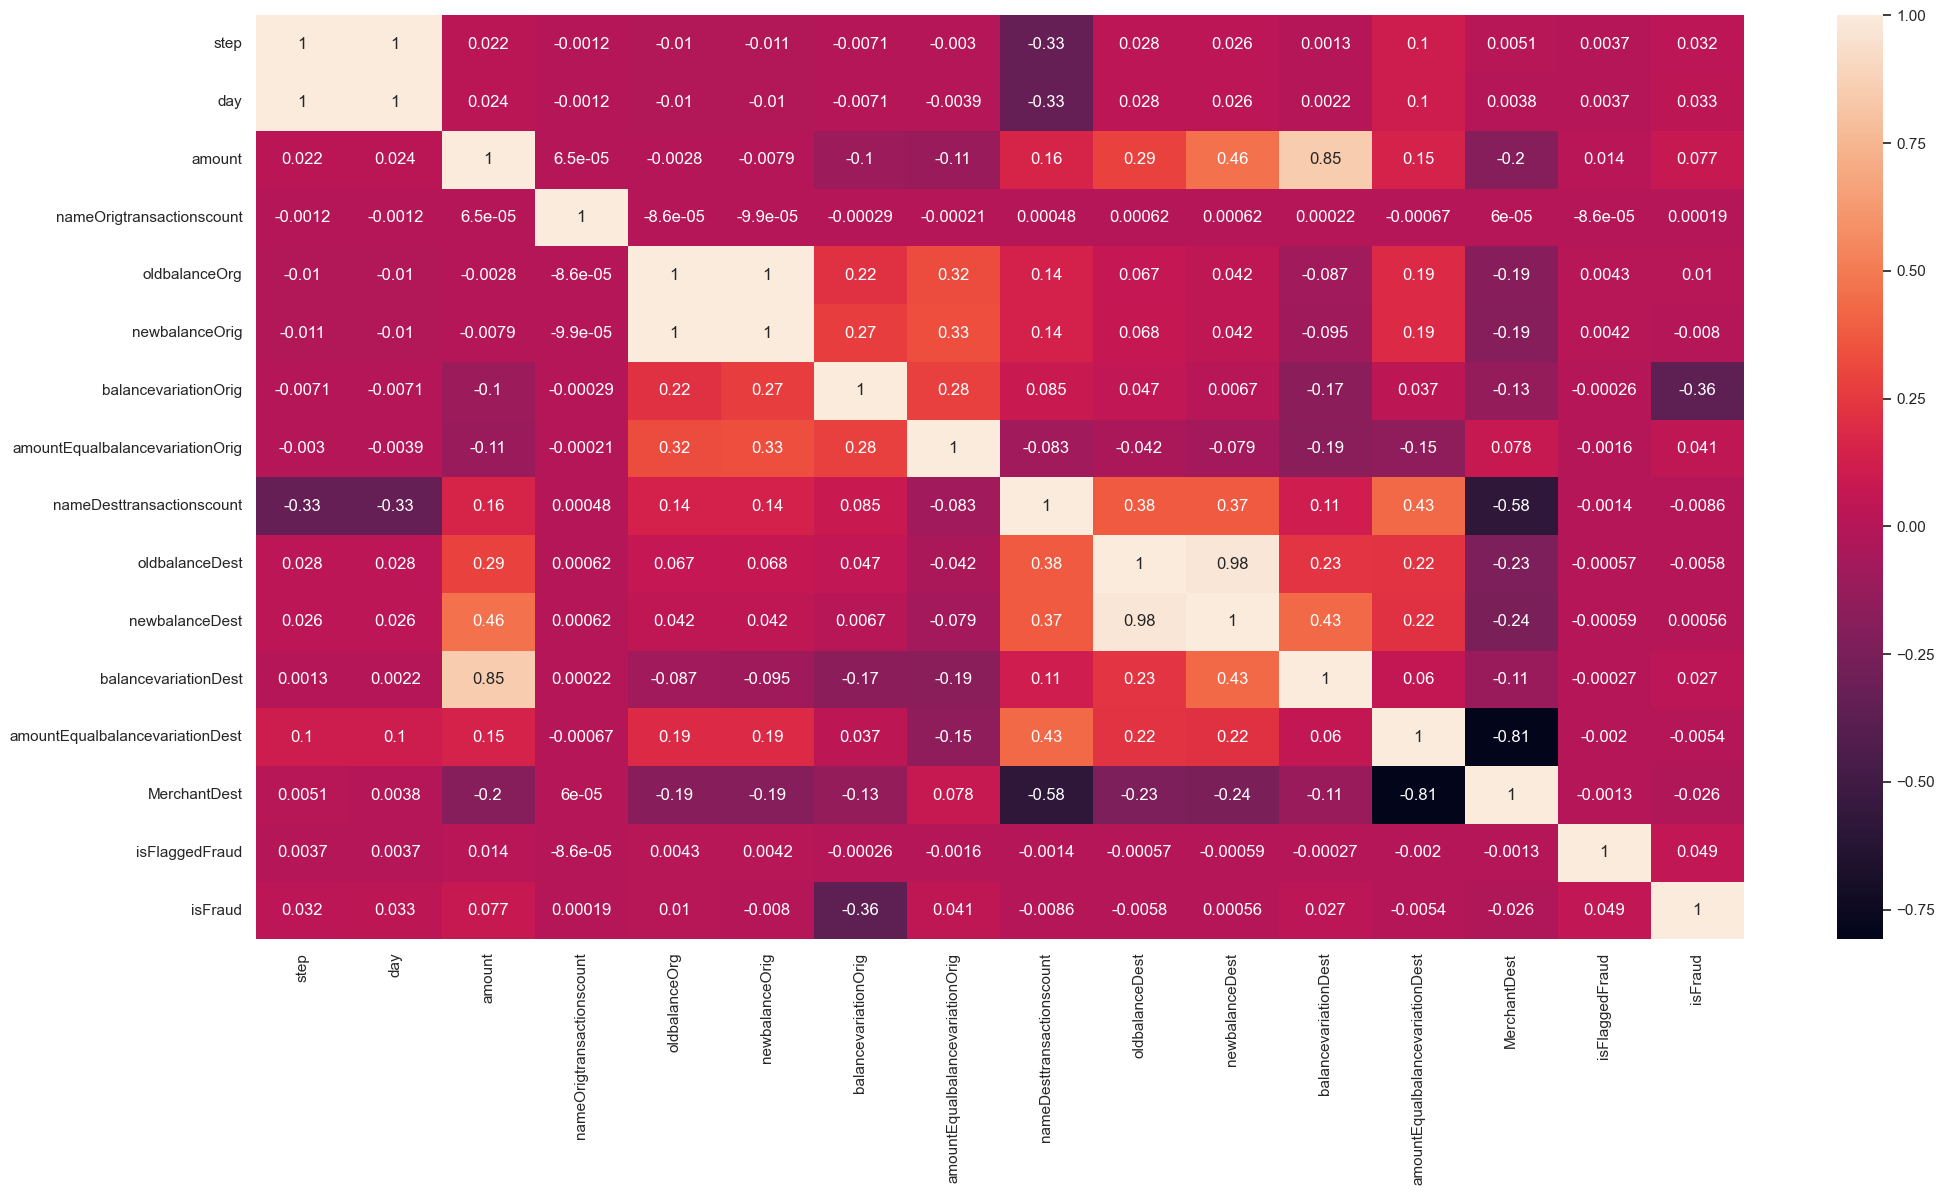

In [81]:
correlation = num_attributes.corr(method='pearson')

fig, ax = plt.subplots(figsize=(24, 12))
sns.heatmap(correlation, annot=True, ax=ax)
plt.show()

In [99]:
df_correlations_n = pd.DataFrame({'Feature A': ['step', 'day', 'balancevariationOrig', 'nameDesttransactioncount', 'amountEqualbalancevariationDest'],
                                         'Feature B': ['namedesttransactioncount', 'namedesttransactioncount', 'isFraud', 'MercahntDest', 'MerchantDest'],
                                         'Correlation': [-0.33, -0.33, -0.36, -0.58, -0.81]})

df_correlations_p = pd.DataFrame({'Feature A': ['amount', 'oldbalanceOrg', 'oldbalanceOrg', 'newbalanceOrg', 'nameDesttransactioncount', 'nameDesttransactioncount', 'newbalanceDest', 'nameDesttransactioncount', 'amount', 'amount', 'oldbalanceDest'],
                                'Feature B': ['oldbalancedest', 'amountEqualbalancevariationOrig', 'newbalanceOrg', 'amountEqualbalancevariationOrig', 'newbalancedest', 'oldbalancedest', 'balancevariationDest', 'amountEqualbalancevariationDest', 'newbalancedest', 'balancevariationdest', 'newbalanceDest'],
                                'Correlation': [0.29, 0.32, 1, 0.33, 0.37, 0.38, 0.43, 0.43, 0.46, 0.85, 0.98]})

df_correlations = pd.concat([df_correlations_n, df_correlations_p])
df_correlations.sort_values(by='Correlation', key=lambda x: abs(x), ascending=False)

,Feature A,Feature B,Correlation
2,oldbalanceOrg,newbalanceOrg,1.00
10,oldbalanceDest,newbalanceDest,0.98
9,amount,balancevariationdest,0.85
4,amountEqualbalancevariationDest,MerchantDest,-0.81
3,nameDesttransactioncount,MercahntDest,-0.58
8,amount,newbalancedest,0.46
6,newbalanceDest,balancevariationDest,0.43
7,nameDesttransactioncount,amountEqualbalancevariationDest,0.43
5,nameDesttransactioncount,oldbalancedest,0.38
4,nameDesttransactioncount,newbalancedest,0.37


- The two highest correlations (1.0 , 0.98) are found between the initial and final balances in the origin and destination accounts.
- The high correlation between amount and balancevariationdest (0.85) is due to the fact that the second feature was derived from the balance balances, which was initially expected to be 1. What is surprising is the lack of a strong correlation between amount and balancevariationOrig.
- The correlation of 0.81 between amountEqualbalancevariationDest and MerchantDest indicates a strong correlation between transactions with a Merchant and the equality between the transaction amount and the variation in the balance of the destination account.

## Removing day 31

In [ ]:
df4 = df4[df4['day'] < 31].copy()

# 5.0 - Data Preparation

In [ ]:
df5 = df4.copy()

## 5.1 - Rescaling

In [ ]:
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'balancevariationOrig', 'oldbalanceDest', 'newbalanceDest', 'balancevariationDest']

for feature in features:
    rs = RobustScaler()
    df5[feature] = rs.fit_transform(df5[[feature]].values)
    pickle.dump(rs, open(f'\\Users\\galves\\Documents\\Gabriel\\Ciência de dados\\Cursos\\new_project\\blocker_fraud_company\\parameters\\{feature}.pkl', 'wb'))

In [ ]:
features = ['step', 'day', 'nameOrigtransactionscount', 'nameDesttransactionscount']

for feature in features:
    mms = MinMaxScaler()
    df5[feature] = mms.fit_transform(df5[[feature]].values)
    pickle.dump(mms, open(f'\\Users\\galves\\Documents\\Gabriel\\Ciência de dados\\Cursos\\new_project\\blocker_fraud_company\\parameters\\{feature}.pkl', 'wb'))

## 5.2 - Transformation

### 5.2.1 - Encoding

In [ ]:
#OneHotEncoder
df5 = pd.get_dummies(df5, prefix=['type'], columns=['type'])
df5 = df5.replace({True: 1, False: 0})

### 5.2.2 - Nature Transformation

In [ ]:
df5['day_sin'] = df5['day'].apply( lambda x: np.sin( x * (2. * np.pi/31 ) ) )
df5['day_cos'] = df5['day'].apply( lambda x: np.cos( x * (2. * np.pi/31 ) ) )